# Problem Statement
Forecast the Airlines Passengers.
Prepare a document for each model explaining how many dummy variables you have created and RMSE value for each model. Finally which model you will use for Forecasting.

# Importing Necessary Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# Importing Aairlines Data

In [2]:
df = pd.read_excel('Airlines+Data.xlsx')
df.head()

,Month,Passengers
0,1995-01-01,112
1,1995-02-01,118
2,1995-03-01,132
3,1995-04-01,129
4,1995-05-01,121


# Exploratory Data Analysis

In [3]:
df.isnull().sum()

Month         0
Passengers    0
dtype: int64

In [4]:
df.shape

(96, 2)

In [5]:
df.dtypes

Month         datetime64[ns]
Passengers             int64
dtype: object

In [6]:
df.nunique()

Month         96
Passengers    80
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Month       96 non-null     datetime64[ns]
 1   Passengers  96 non-null     int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 1.6 KB


In [8]:
df.describe(include='all', datetime_is_numeric = True)

,Month,Passengers
count,96,96.000000
mean,1998-12-16 05:00:00,213.708333
min,1995-01-01 00:00:00,104.000000
25%,1996-12-24 06:00:00,156.000000
50%,1998-12-16 12:00:00,200.000000
75%,2000-12-08 18:00:00,264.750000
max,2002-12-01 00:00:00,413.000000
std,NaN,71.918216


# Feature Engineering

In [9]:
df.rename({'Month':'Date'}, axis = 1, inplace = True)

### Making the Date as DateTime index for the Dataframe

In [10]:
df1 = df.copy()
df1.set_index('Date', inplace = True)

In [11]:
df1.head()

,Passengers
Date,
1995-01-01,112
1995-02-01,118
1995-03-01,132
1995-04-01,129
1995-05-01,121


#### Separating Month and Year into Separate Column for Visualization and removing meaningful insight of the data

In [12]:
df["Date"] = pd.to_datetime(df.Date, format = "%b-%y")
df["month"] = df.Date.dt.strftime("%b") 
df["year"] = df.Date.dt.strftime("%Y") 
df.head()

,Date,Passengers,month,year
0,1995-01-01,112,Jan,1995
1,1995-02-01,118,Feb,1995
2,1995-03-01,132,Mar,1995
3,1995-04-01,129,Apr,1995
4,1995-05-01,121,May,1995


### Data Visualization

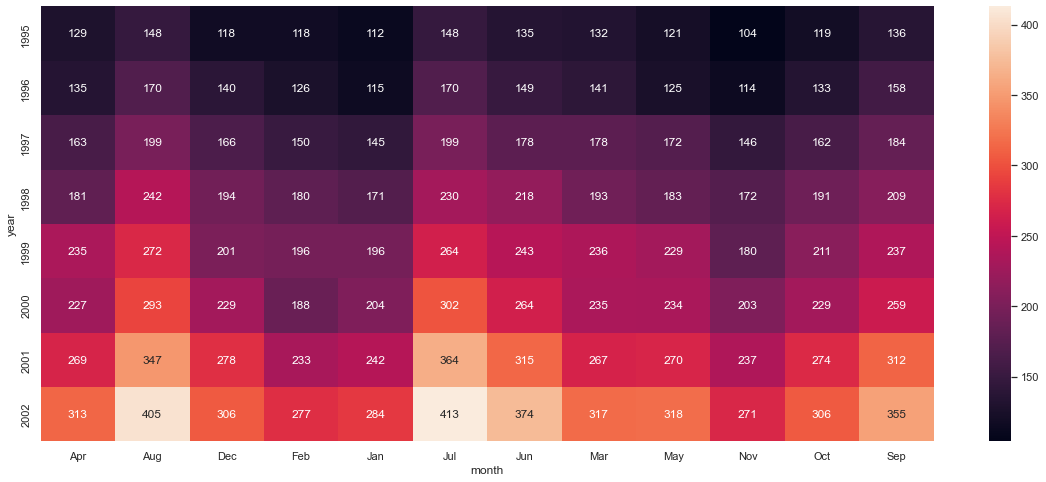

In [13]:
plt.figure(figsize = (20,8))
heatmap_y_month = pd.pivot_table(data = df, values = "Passengers", index = "year", columns = "month", aggfunc = "mean", 
                                 fill_value = 0)
sns.heatmap(heatmap_y_month, annot = True, fmt = "g") 
plt.show()

### Line plot

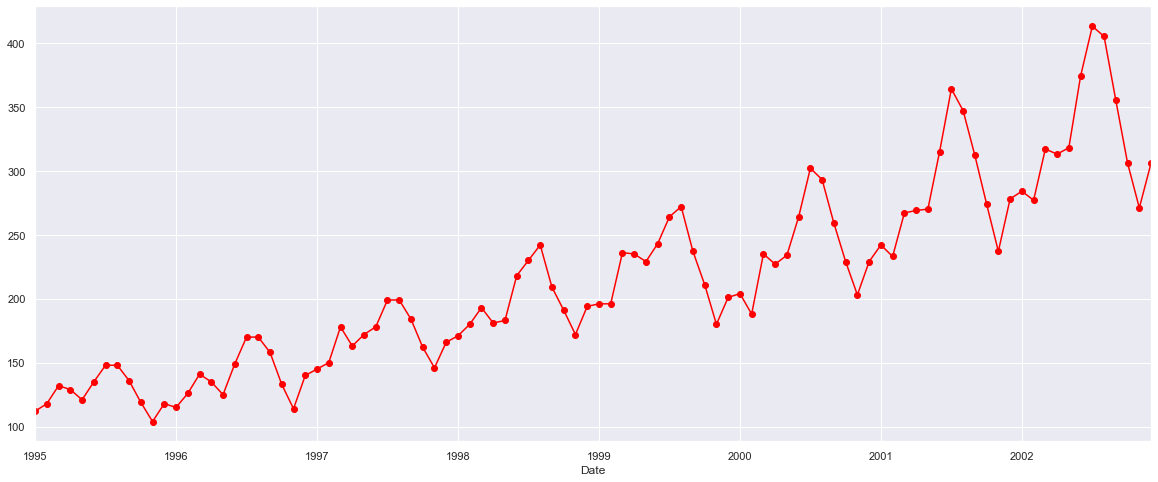

In [14]:
df1['Passengers'].plot(figsize = (20, 8), color = 'red', marker = 'o')
plt.show()

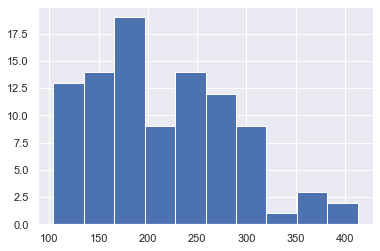

In [15]:
df.Passengers.hist()
plt.show()

### Lag plot

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


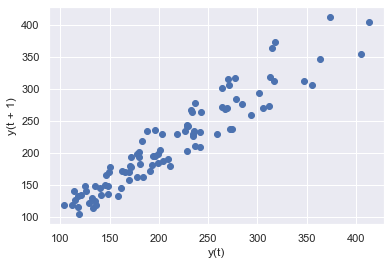

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


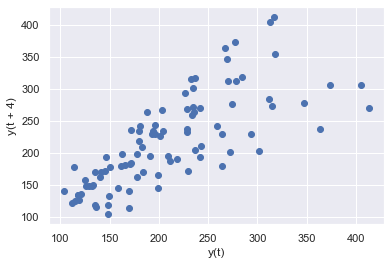

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


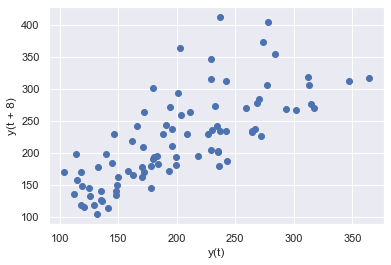

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


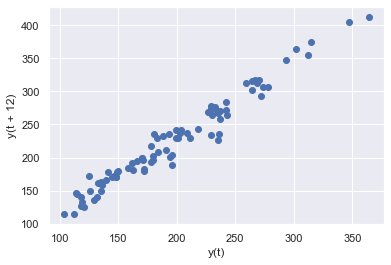

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


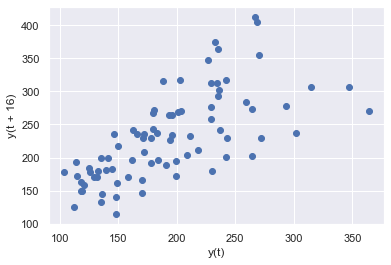

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


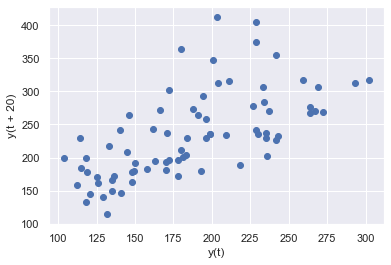

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


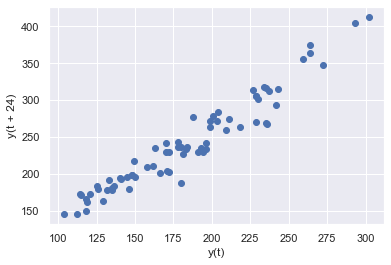

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


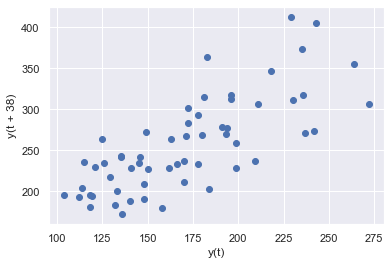

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


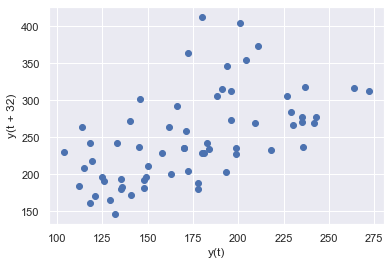

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


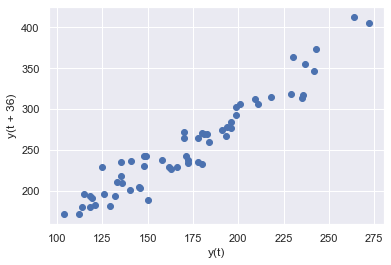

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


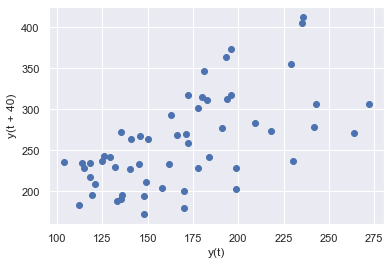

In [16]:
from pandas.plotting import lag_plot

for i in [1, 4, 8, 12, 16, 20, 24, 38, 32, 36, 40]:
    lag_plot(df['Passengers'], lag = i)
    plt.show()

### Moving Average

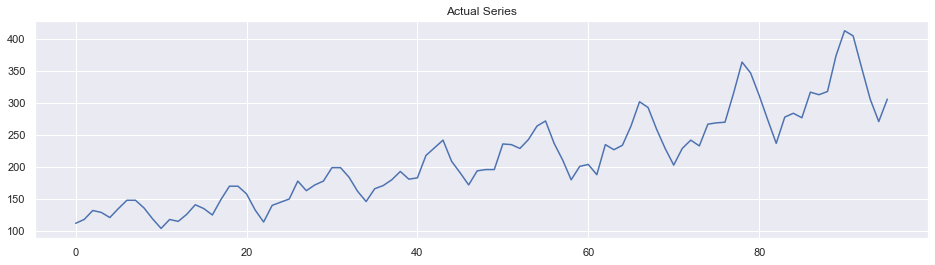

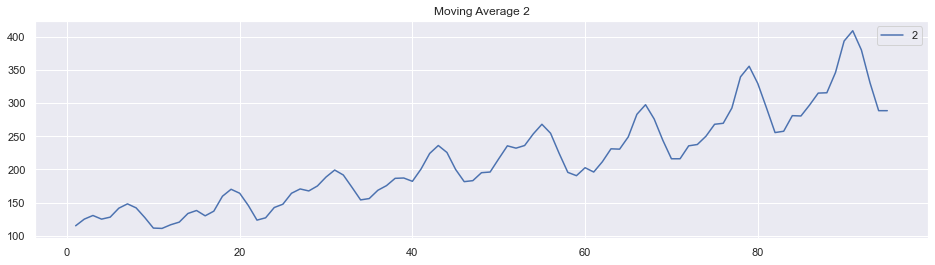

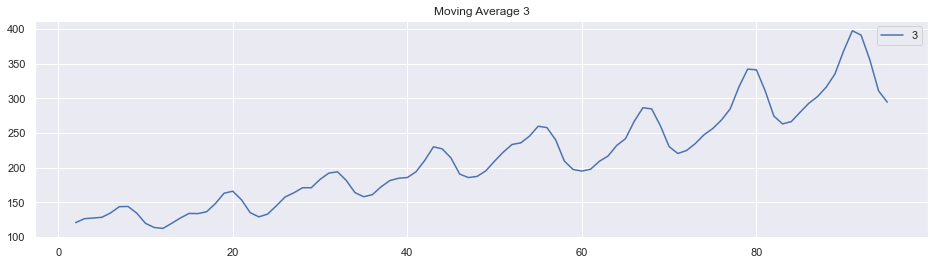

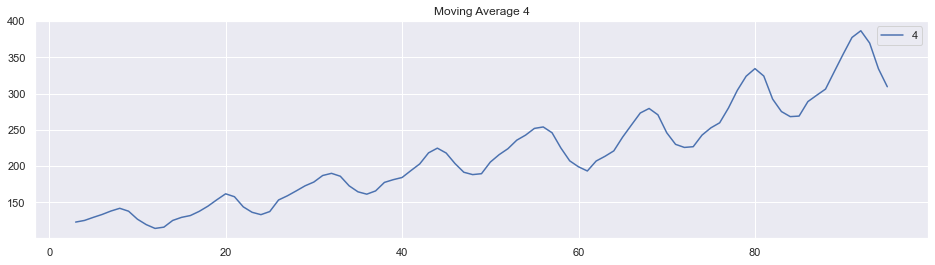

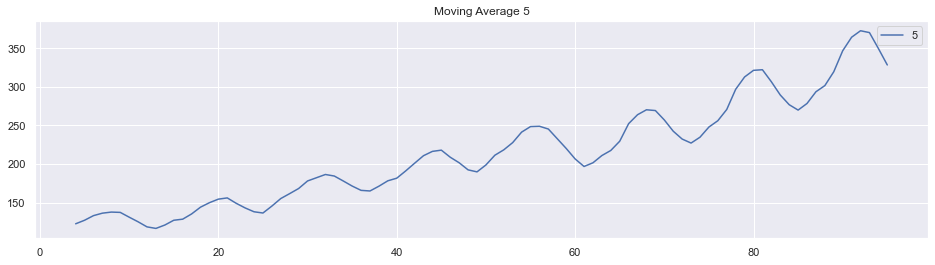

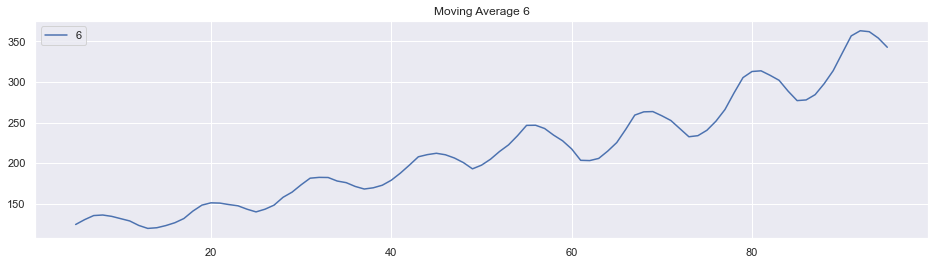

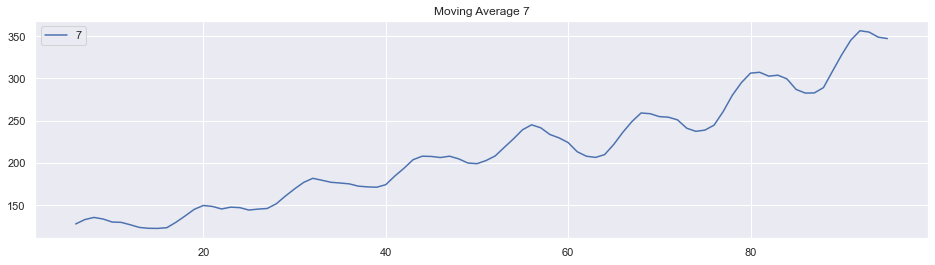

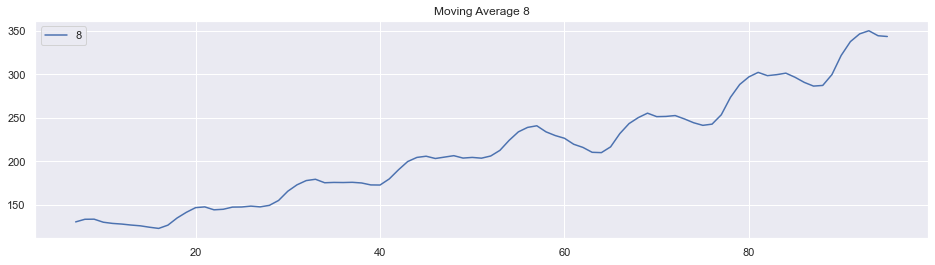

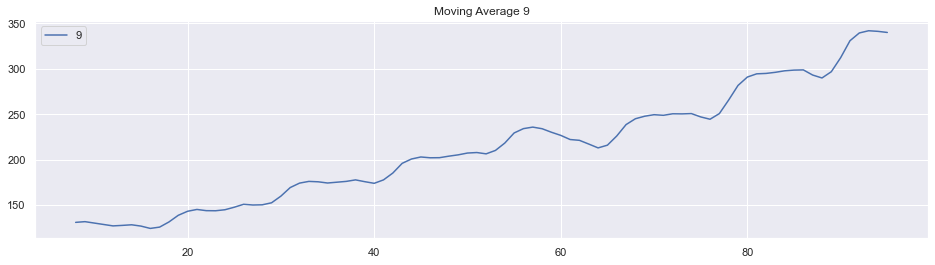

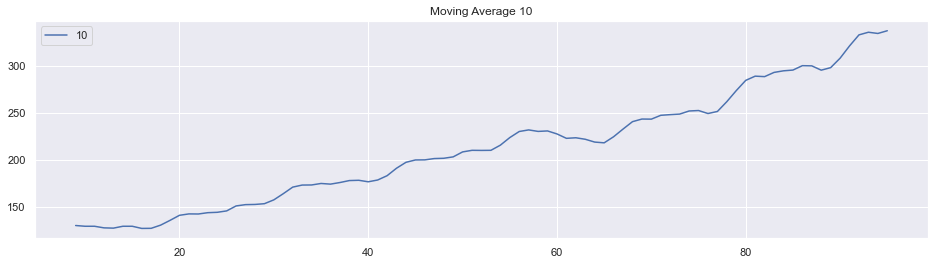

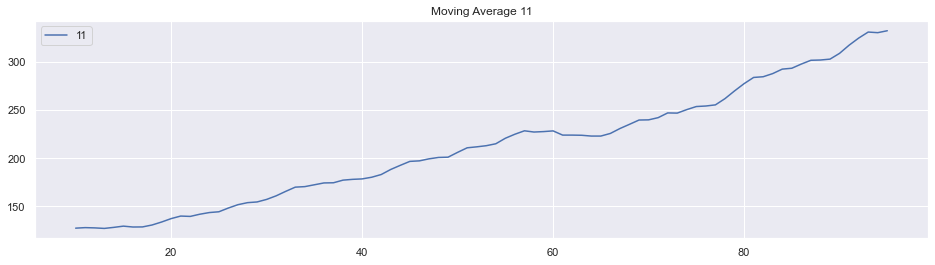

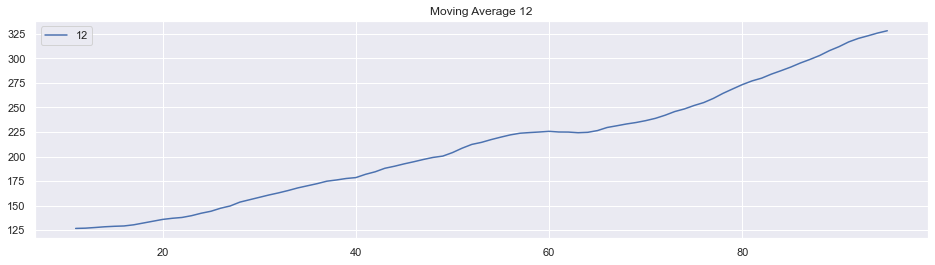

In [17]:
plt.figure(figsize = (16,4))
df['Passengers'].plot(label = "Actual")
plt.title("Actual Series")
for i in range(2,13):
    plt.figure(figsize = (16,4))
    df['Passengers'].rolling(i).mean().plot(label = str(i))
    plt.title("Moving Average "+str(i))
    plt.legend(loc = 'best')
    plt.show()

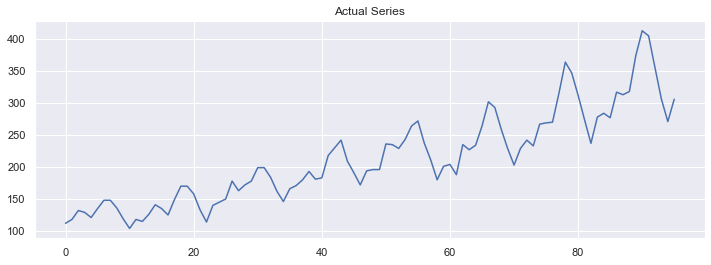

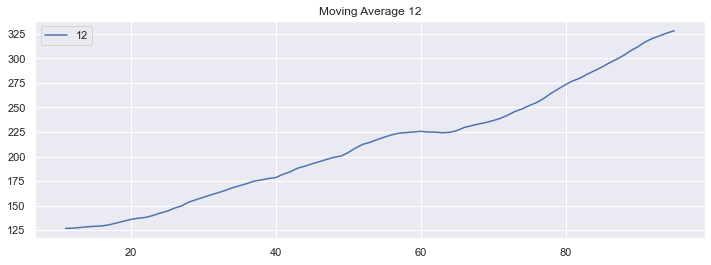

In [18]:
plt.figure(figsize = (12,4))
df['Passengers'].plot()
plt.title("Actual Series")

plt.figure(figsize = (12,4))
df['Passengers'].rolling(12).mean().plot(label = str(12))
plt.title("Moving Average "+str(12))
plt.legend(loc  ='best')
plt.show()

### Time series decomposition plot

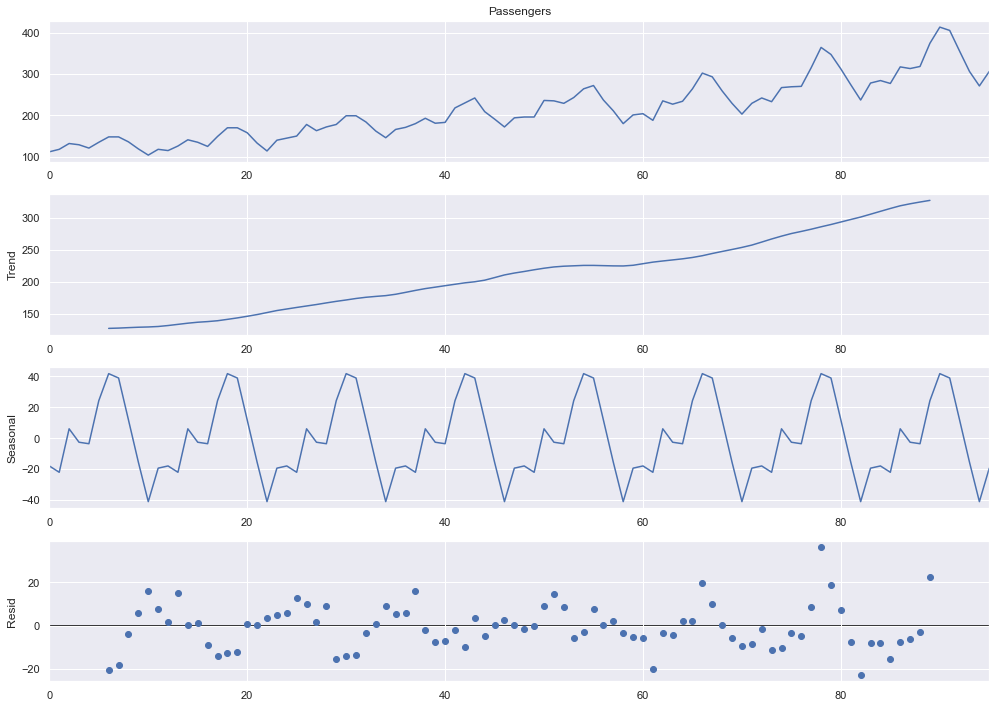

In [19]:
from statsmodels.tsa.seasonal import seasonal_decompose

decompose_ts_add = seasonal_decompose(df['Passengers'], period = 12)
with plt.rc_context():
    plt.rc("figure", figsize = (14,10))
    decompose_ts_add.plot()
    plt.show()

### Autocorrelation Function (ACF)                    


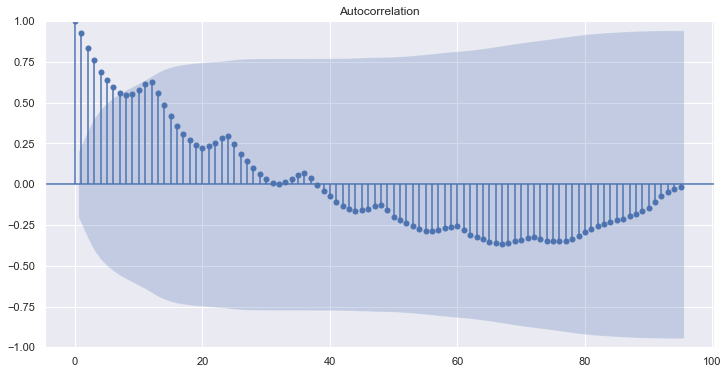

In [20]:
import statsmodels.graphics.tsaplots as tsa_plots

with plt.rc_context():
    plt.rc("figure", figsize = (12,6))
    tsa_plots.plot_acf(df['Passengers'], lags = 95)
    plt.show()

##### Blue bars on an ACF plot above are the error bands, and anything within these bars is not statistically significant. It means that correlation values outside of this area are very likely a correlation and not a statistical fluke. The confidence interval is set to 95% by default.              
### Partial Autocorrelation Function (PACF)                             

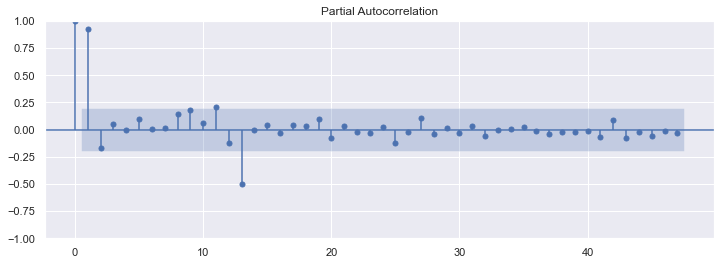

In [21]:
with plt.rc_context():
    plt.rc("figure", figsize = (12,4))
    tsa_plots.plot_pacf(df['Passengers'], lags = 47, method  ='ywm')
    plt.show()

##### To summarize, a partial autocorrelation function captures a “direct” correlation between time series and a lagged version of itself.

In [22]:
visual = df1.copy()
visual.reset_index(inplace = True)
visual['date'] = pd.to_datetime(visual['Date'])
visual['year'] = visual['Date'].dt.year
visual['month'] = visual['Date'].dt.month
visual['week'] = visual['Date'].dt.isocalendar().week
visual['quarter'] = visual['Date'].dt.quarter
visual['day_of_week'] = visual['Date'].dt.day_name()
visual.drop('Date', axis = 1 , inplace = True)
visual.head()

,Passengers,date,year,month,week,quarter,day_of_week
0,112,1995-01-01,1995,1,52,1,Sunday
1,118,1995-02-01,1995,2,5,1,Wednesday
2,132,1995-03-01,1995,3,9,1,Wednesday
3,129,1995-04-01,1995,4,13,2,Saturday
4,121,1995-05-01,1995,5,18,2,Monday


In [23]:
visual.year.unique()

array([1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002], dtype=int64)

# Time Series Decomposition           
### Additive Seasonal Decomposition

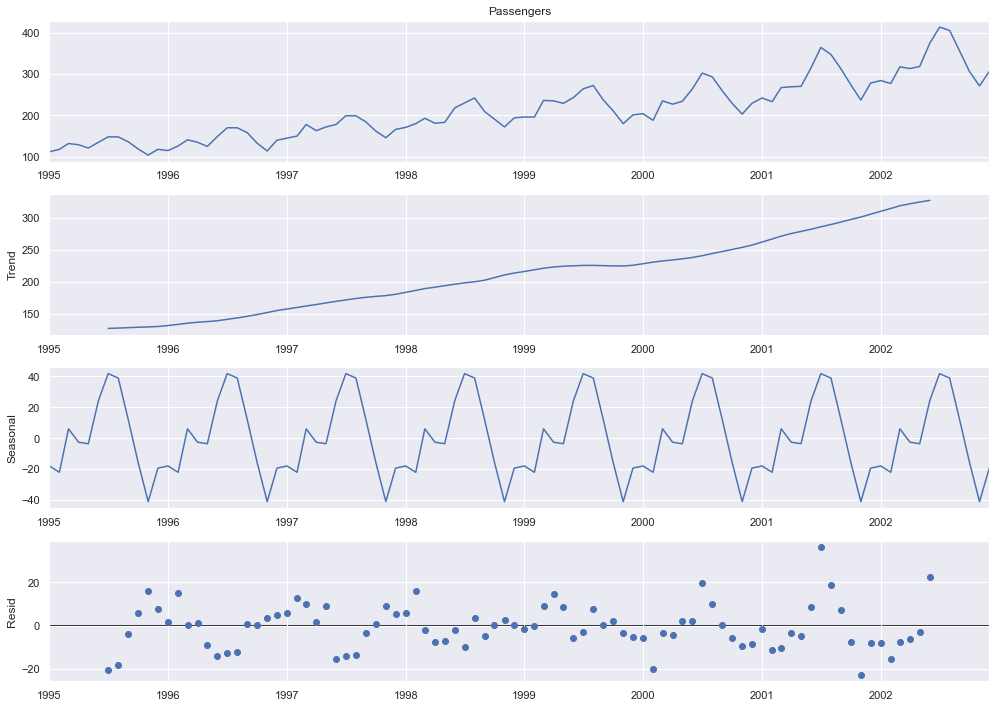

In [24]:
decompose_ts_add = seasonal_decompose(df1['Passengers'], period = 12, model = 'additive')
with plt.rc_context():
    plt.rc("figure", figsize = (14,10))
    decompose_ts_add.plot()
    plt.show()

### Multiplicative Seasonal Decomposition 

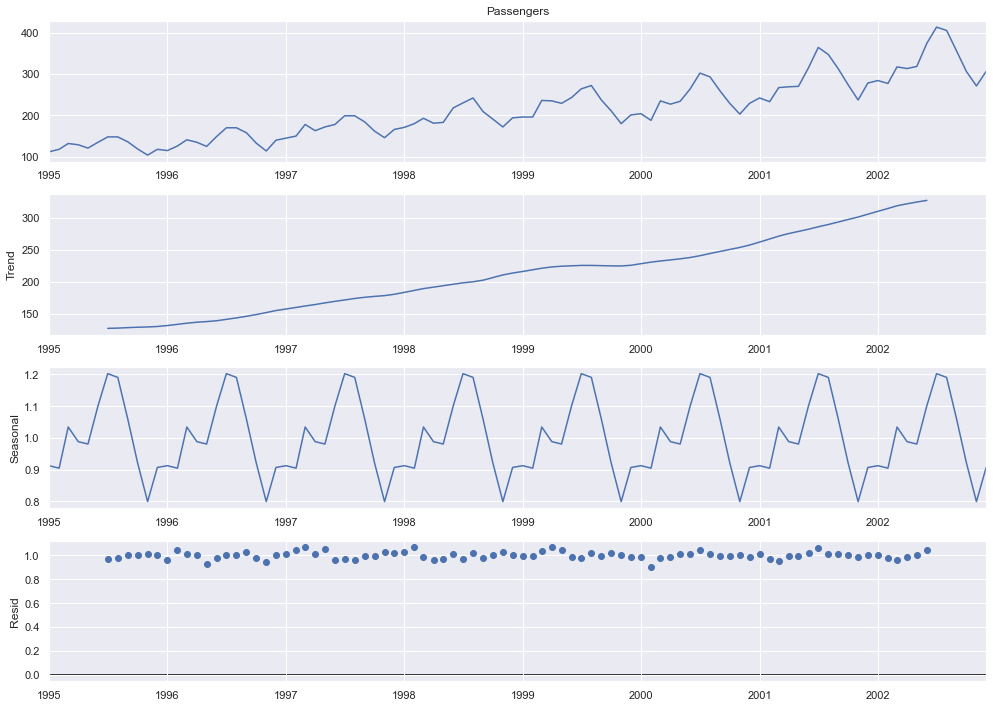

In [25]:
decompose_ts_add = seasonal_decompose(df1['Passengers'], period = 12, model = 'multiplicative')
with plt.rc_context():
    plt.rc("figure", figsize = (14,10))
    decompose_ts_add.plot()
    plt.show()

# Splitting Train and Test Data
Leaving Test Data with 2 Years of Time Series

In [26]:
train_data = df1[:72]
test_data = df1[72:]

In [27]:
print('Train:', train_data.index.min(), train_data.index.max(), '\n', 'Test:', test_data.index.min(), test_data.index.max())

Train: 1995-01-01 00:00:00 2000-12-01 00:00:00 
 Test: 2001-01-01 00:00:00 2002-12-01 00:00:00


###### We are going to forecast for the last two years. 2001 and 2002.

Last 24 records contain From 2001 to 2002 data.

<AxesSubplot:xlabel='Date'>

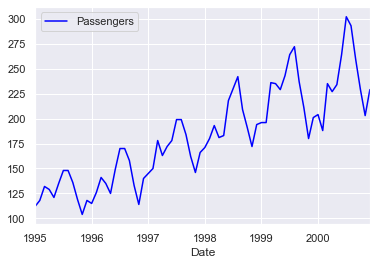

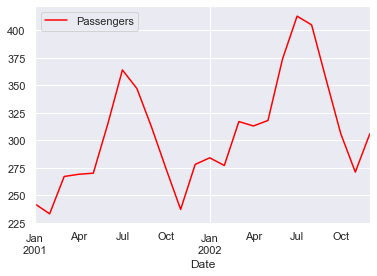

In [28]:
train_data.plot(legend = True, label ='TRAIN', color = 'blue')
test_data.plot(legend = True, label ='TEST', color = 'red')

### Evaluation Metric MAPE

In [29]:
def MAPE(pred, org):
    temp = np.abs((pred - org)/org) * 100
    return np.mean(temp)

### Exponential Methods
Simple Exponential Method          
Using Forecast Attribute

In [30]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
from sklearn.metrics import mean_squared_error
from math import sqrt

ses_model = SimpleExpSmoothing(train_data['Passengers']).fit(optimized = True)
test_pred_ses = ses_model.forecast(24)
train_pred_ses = ses_model.fittedvalues
test_rmse_ses = sqrt(mean_squared_error(test_pred_ses, test_data['Passengers']))
train_rmse_ses = sqrt(mean_squared_error(train_pred_ses, train_data))
mape_ses = MAPE(test_pred_ses, test_data['Passengers'])
print('Simple Exponential Method Evaluation',"\n", 'MAPE = {}'.format(mape_ses), "\n", 
      'Train RMSE = {}'.format(train_rmse_ses), "\n", 'Test RMSE = {}'.format(test_rmse_ses))

Simple Exponential Method Evaluation 
 MAPE = 23.38228335004595 
 Train RMSE = 19.03177173091145 
 Test RMSE = 91.11325402904713


C:\Users\BHANUKIRAN\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


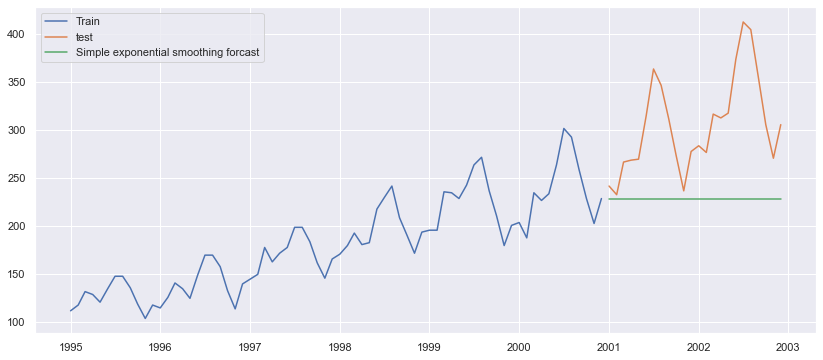

In [31]:
plt.figure(figsize = (14,6))
plt.plot(train_data, label ='Train')
plt.plot(test_data, label ='test')
plt.plot(test_pred_ses, label ='Simple exponential smoothing forcast')
plt.legend(loc ='best')
plt.show()

### Observation
    No seasonality captures.
    Most recent observation gets higher weightages than the older ones for forecasting.

### Holt method (Double Exponential)
Captures both Level and Trend .

In [32]:
from statsmodels.tsa.holtwinters import Holt
dexp_model  = Holt(train_data).fit(optimized = True)
test_pred_dexp = dexp_model.forecast(24)
train_pred_dexp = dexp_model.fittedvalues
test_rmse_dexp = sqrt(mean_squared_error(test_pred_dexp, test_data['Passengers']))
train_rmse_dexp = sqrt(mean_squared_error(train_pred_dexp, train_data))
mape_dexp = MAPE(test_pred_dexp, test_data['Passengers'])
print('Double Exponential Method Evaluation', "\n", 'MAPE = {}'.format(mape_dexp), "\n",
      'Train RMSE = {}'.format(train_rmse_dexp), "\n", 'Test RMSE = {}'.format(test_rmse_dexp))

Double Exponential Method Evaluation 
 MAPE = 17.149025584030046 
 Train RMSE = 18.961289994538912 
 Test RMSE = 71.6347776288056


C:\Users\BHANUKIRAN\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


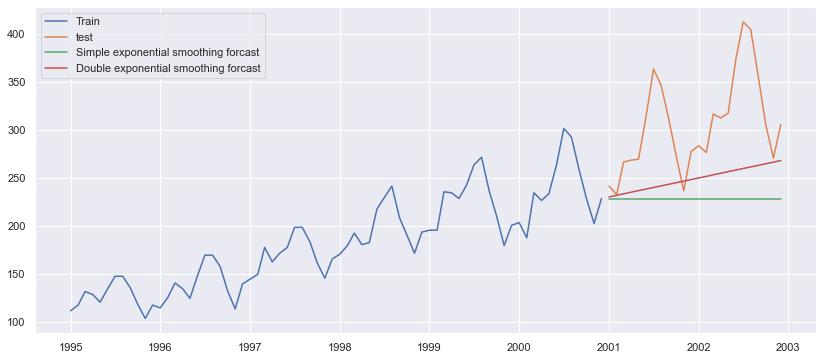

In [33]:
plt.figure(figsize = (14,6))
plt.plot(train_data, label ='Train')
plt.plot(test_data, label ='test')
plt.plot(test_pred_ses, label ='Simple exponential smoothing forcast')
plt.plot(test_pred_dexp, label ='Double exponential smoothing forcast')
plt.legend(loc ='best')
plt.show()

### Observation 
    We can see that we are able to capture the trend of the data.              
    We were not able to capture the seasonality.                                 
### Holts winter exponential smoothing with additive seasonality and trend (Triple Exponential)                   
Captures Level, Trend and Seasonality.                                     

In [34]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing
texp_add_model  = ExponentialSmoothing(train_data, seasonal = "add", trend ="add", seasonal_periods = 12).fit(optimized=True)
test_pred_ad_texp = texp_add_model.forecast(24)
train_pred_ad_texp = texp_add_model.fittedvalues
test_rmse_ad_texp = sqrt(mean_squared_error(test_pred_ad_texp, test_data['Passengers']))
train_rmse_ad_texp = sqrt(mean_squared_error(train_pred_ad_texp, train_data))
mape_ad_texp = MAPE(test_pred_ad_texp, test_data['Passengers'])
print('Triple Exponential with Additive Trend and Seosonality Method Evaluation', "\n", 'MAPE = {}'.format(mape_ad_texp), "\n",
      'Train RMSE = {}'.format(train_rmse_ad_texp), "\n", 'Test RMSE = {}'.format(test_rmse_ad_texp))

C:\Users\BHANUKIRAN\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


Triple Exponential with Additive Trend and Seosonality Method Evaluation 
 MAPE = 12.084270987248688 
 Train RMSE = 7.751303510644329 
 Test RMSE = 47.56853148096913


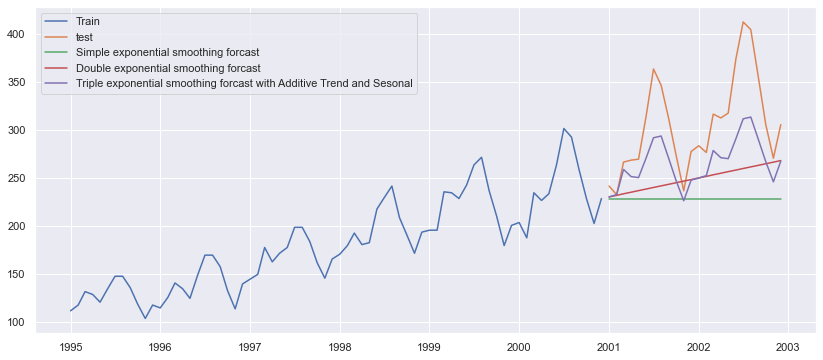

In [35]:
plt.figure(figsize = (14,6))
plt.plot(train_data, label ='Train')
plt.plot(test_data, label ='test')
plt.plot(test_pred_ses, label ='Simple exponential smoothing forcast')
plt.plot(test_pred_dexp, label ='Double exponential smoothing forcast')
plt.plot(test_pred_ad_texp, label ='Triple exponential smoothing forcast with Additive Trend and Sesonal')
plt.legend(loc ='best')
plt.show()

### Observation
It captures the trend, which we can see that the forecasted values are lower level than the test level.            
It also captures the seasonality.                    
The peak of the forecasted value is lower than the actual.                
### Holts winter exponential smoothing with multiplicative seasonality and additive trend (Triple Exponential)

In [36]:
texp_mul_ad_model  = ExponentialSmoothing(train_data, seasonal="mul", trend="add", seasonal_periods=12).fit(optimized=True)
test_pred_mul_ad_texp = texp_mul_ad_model.forecast(24)
train_pred_mul_ad_texp = texp_mul_ad_model.fittedvalues
test_rmse_mul_ad_texp = sqrt(mean_squared_error(test_pred_mul_ad_texp, test_data['Passengers']))
train_rmse_mul_ad_texp = sqrt(mean_squared_error(train_pred_mul_ad_texp, train_data))
mape_mul_ad_texp = MAPE(test_pred_mul_ad_texp, test_data['Passengers'])
print('Triple Exponential Method with Multiplicative Seasonality and Additive Trend', "\n",
      'MAPE = {}'.format(mape_mul_ad_texp),"\n",
      'Train RMSE = {}'.format(train_rmse_mul_ad_texp), "\n", 'Test RMSE = {}'.format(test_rmse_mul_ad_texp))

C:\Users\BHANUKIRAN\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


Triple Exponential Method with Multiplicative Seasonality and Additive Trend 
 MAPE = 9.368507048672798 
 Train RMSE = 6.386634437545614 
 Test RMSE = 34.989900508860515


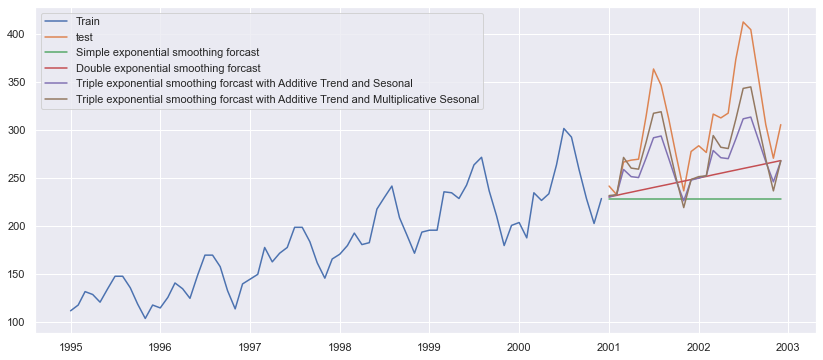

In [37]:
plt.figure(figsize=(14,6))
plt.plot(train_data, label='Train')
plt.plot(test_data, label='test')
plt.plot(test_pred_ses, label='Simple exponential smoothing forcast')
plt.plot(test_pred_dexp, label='Double exponential smoothing forcast')
plt.plot(test_pred_ad_texp, label='Triple exponential smoothing forcast with Additive Trend and Sesonal')
plt.plot(test_pred_mul_ad_texp, label='Triple exponential smoothing forcast with Additive Trend and Multiplicative Sesonal')
plt.legend(loc='best')
plt.show()

### Observation
We can see that the errors have reduced drastically once we are able to capture the level, trend and seasonality altogether.
### Holts winter exponential smoothing with Additive seasonality and multiplicative trend (Triple Exponential)

In [38]:
texp_ad_mul_model  = ExponentialSmoothing(train_data,seasonal="add",trend="mul",seasonal_periods=12).fit(smoothing_level=0.1, smoothing_slope=0.5)
test_pred_ad_mul_texp  = texp_ad_mul_model.forecast(24)
train_pred_ad_mul_texp  = texp_ad_mul_model.fittedvalues
test_rmse_ad_mul_texp  = sqrt(mean_squared_error(test_pred_ad_mul_texp ,test_data.Passengers))
train_rmse_ad_mul_texp  = sqrt(mean_squared_error(train_pred_ad_mul_texp ,train_data))
mape_ad_mul_texp  = MAPE(test_pred_ad_mul_texp,test_data.Passengers)
print('Triple Exponential Method with Additive Seasonality and Multiplicative Trend',"\n",\
      'Mean Absolute Percent Error = {}'.format(mape_ad_mul_texp ),"\n",\
'Train Root Mean Squared Error = {}'.format(train_rmse_ad_mul_texp ),"\n",
'Test Root Mean Squared Error = {}'.format(test_rmse_ad_mul_texp ))

Triple Exponential Method with Additive Seasonality and Multiplicative Trend 
 Mean Absolute Percent Error = 12.720038697644114 
 Train Root Mean Squared Error = 12.745961849041036 
 Test Root Mean Squared Error = 45.89160554538598


C:\Users\BHANUKIRAN\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\BHANUKIRAN\AppData\Local\Temp\ipykernel_12816\202788477.py:1: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  texp_ad_mul_model  = ExponentialSmoothing(train_data,seasonal="add",trend="mul",seasonal_periods=12).fit(smoothing_level=0.1, smoothing_slope=0.5)
C:\Users\BHANUKIRAN\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err


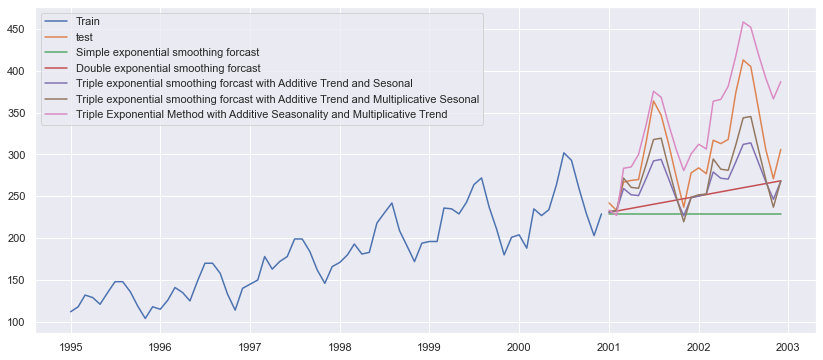

In [39]:
plt.figure(figsize=(14,6))
plt.plot(train_data, label='Train')
plt.plot(test_data, label='test')
plt.plot(test_pred_ses, label='Simple exponential smoothing forcast')
plt.plot(test_pred_dexp, label='Double exponential smoothing forcast')
plt.plot(test_pred_ad_texp, label='Triple exponential smoothing forcast with Additive Trend and Sesonal')
plt.plot(test_pred_mul_ad_texp, label='Triple exponential smoothing forcast with Additive Trend and Multiplicative Sesonal')
plt.plot(test_pred_ad_mul_texp, label='Triple Exponential Method with Additive Seasonality and Multiplicative Trend')
plt.legend(loc='best')
plt.show()

### Observation
It captures the trend, which we can see that the forecasted values are higher level than the test level.    
It also captures the seasonality.                    
The peak of the forecasted value is higher than the actual.            
### Holts winter exponential smoothing with multiplicative seasonality and multiplicative trend (Triple Exponential)

In [40]:
texp_mul_model  = ExponentialSmoothing(train_data,seasonal="mul",trend="mul",seasonal_periods=12).fit(optimized=True)
test_pred_mul_texp  = texp_mul_model.forecast(24)
train_pred_mul_texp  = texp_mul_model.fittedvalues
test_rmse_mul_texp  = sqrt(mean_squared_error(test_pred_mul_texp ,test_data.Passengers))
train_rmse_mul_texp  = sqrt(mean_squared_error(train_pred_mul_texp ,train_data))
mape_mul_texp  = MAPE(test_pred_mul_texp,test_data.Passengers)
print('Triple Exponential Method with multiplicative Trend and Seasonality',"\n",\
      'Mean Absolute Percent Error = {}'.format(mape_mul_texp ),"\n",\
'Train Root Mean Squared Error = {}'.format(train_rmse_mul_texp ),"\n",
'Test Root Mean Squared Error = {}'.format(test_rmse_mul_texp ))

C:\Users\BHANUKIRAN\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\BHANUKIRAN\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err


Triple Exponential Method with multiplicative Trend and Seasonality 
 Mean Absolute Percent Error = 6.0350676966147025 
 Train Root Mean Squared Error = 6.396749788058414 
 Test Root Mean Squared Error = 23.058820548001385


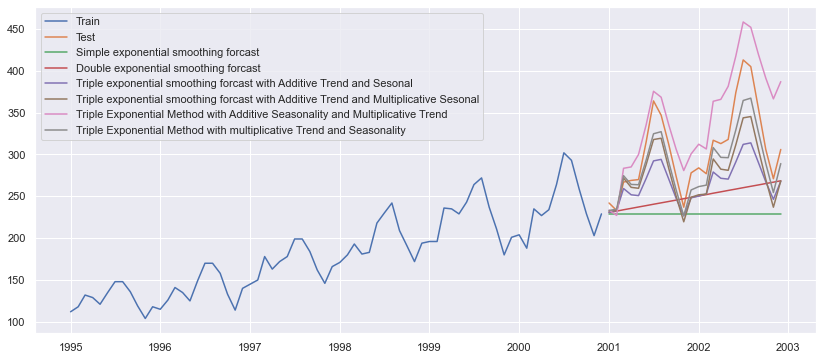

In [41]:
plt.figure(figsize=(14,6))
plt.plot(train_data, label='Train')
plt.plot(test_data, label='Test')
plt.plot(test_pred_ses, label='Simple exponential smoothing forcast')
plt.plot(test_pred_dexp, label='Double exponential smoothing forcast')
plt.plot(test_pred_ad_texp, label='Triple exponential smoothing forcast with Additive Trend and Sesonal')
plt.plot(test_pred_mul_ad_texp, label='Triple exponential smoothing forcast with Additive Trend and Multiplicative Sesonal')
plt.plot(test_pred_ad_mul_texp, label='Triple Exponential Method with Additive Seasonality and Multiplicative Trend')
plt.plot(test_pred_mul_texp, label='Triple Exponential Method with multiplicative Trend and Seasonality')
plt.legend(loc='best')
plt.show()

In [42]:
#Comparing the results 

Evaluation = {"Models"          :pd.Series(["Simple_Exp","Double_Exp","Triple_Exp_ad","Triple_Exp_mul_ad",
                                            "Triple_Exp_ad_mul","Triple_Exp_mul"]),
              "Train_RMSE"      :pd.Series([train_rmse_ses, train_rmse_dexp, train_rmse_ad_texp, train_rmse_mul_ad_texp,
                                            train_rmse_ad_mul_texp, train_rmse_mul_texp]),
              "Test_MAPE(%)"    :pd.Series([mape_ses, mape_dexp, mape_ad_texp, mape_mul_ad_texp, mape_ad_mul_texp, 
                                            mape_mul_texp]),
              "Test_RMSE_Values":pd.Series([test_rmse_ses, test_rmse_dexp, test_rmse_ad_texp, test_rmse_mul_ad_texp,
                                            test_rmse_ad_mul_texp, test_rmse_mul_texp])
             }
table_evaluation=pd.DataFrame(Evaluation)
table_evaluation.sort_values(['Test_MAPE(%)'], inplace=True, ignore_index=True)
table_evaluation

,Models,Train_RMSE,Test_MAPE(%),Test_RMSE_Values
0,Triple_Exp_mul,6.396750,6.035068,23.058821
1,Triple_Exp_mul_ad,6.386634,9.368507,34.989901
2,Triple_Exp_ad,7.751304,12.084271,47.568531
3,Triple_Exp_ad_mul,12.745962,12.720039,45.891606
4,Double_Exp,18.961290,17.149026,71.634778
5,Simple_Exp,19.031772,23.382283,91.113254


### Visualizing Models Performance

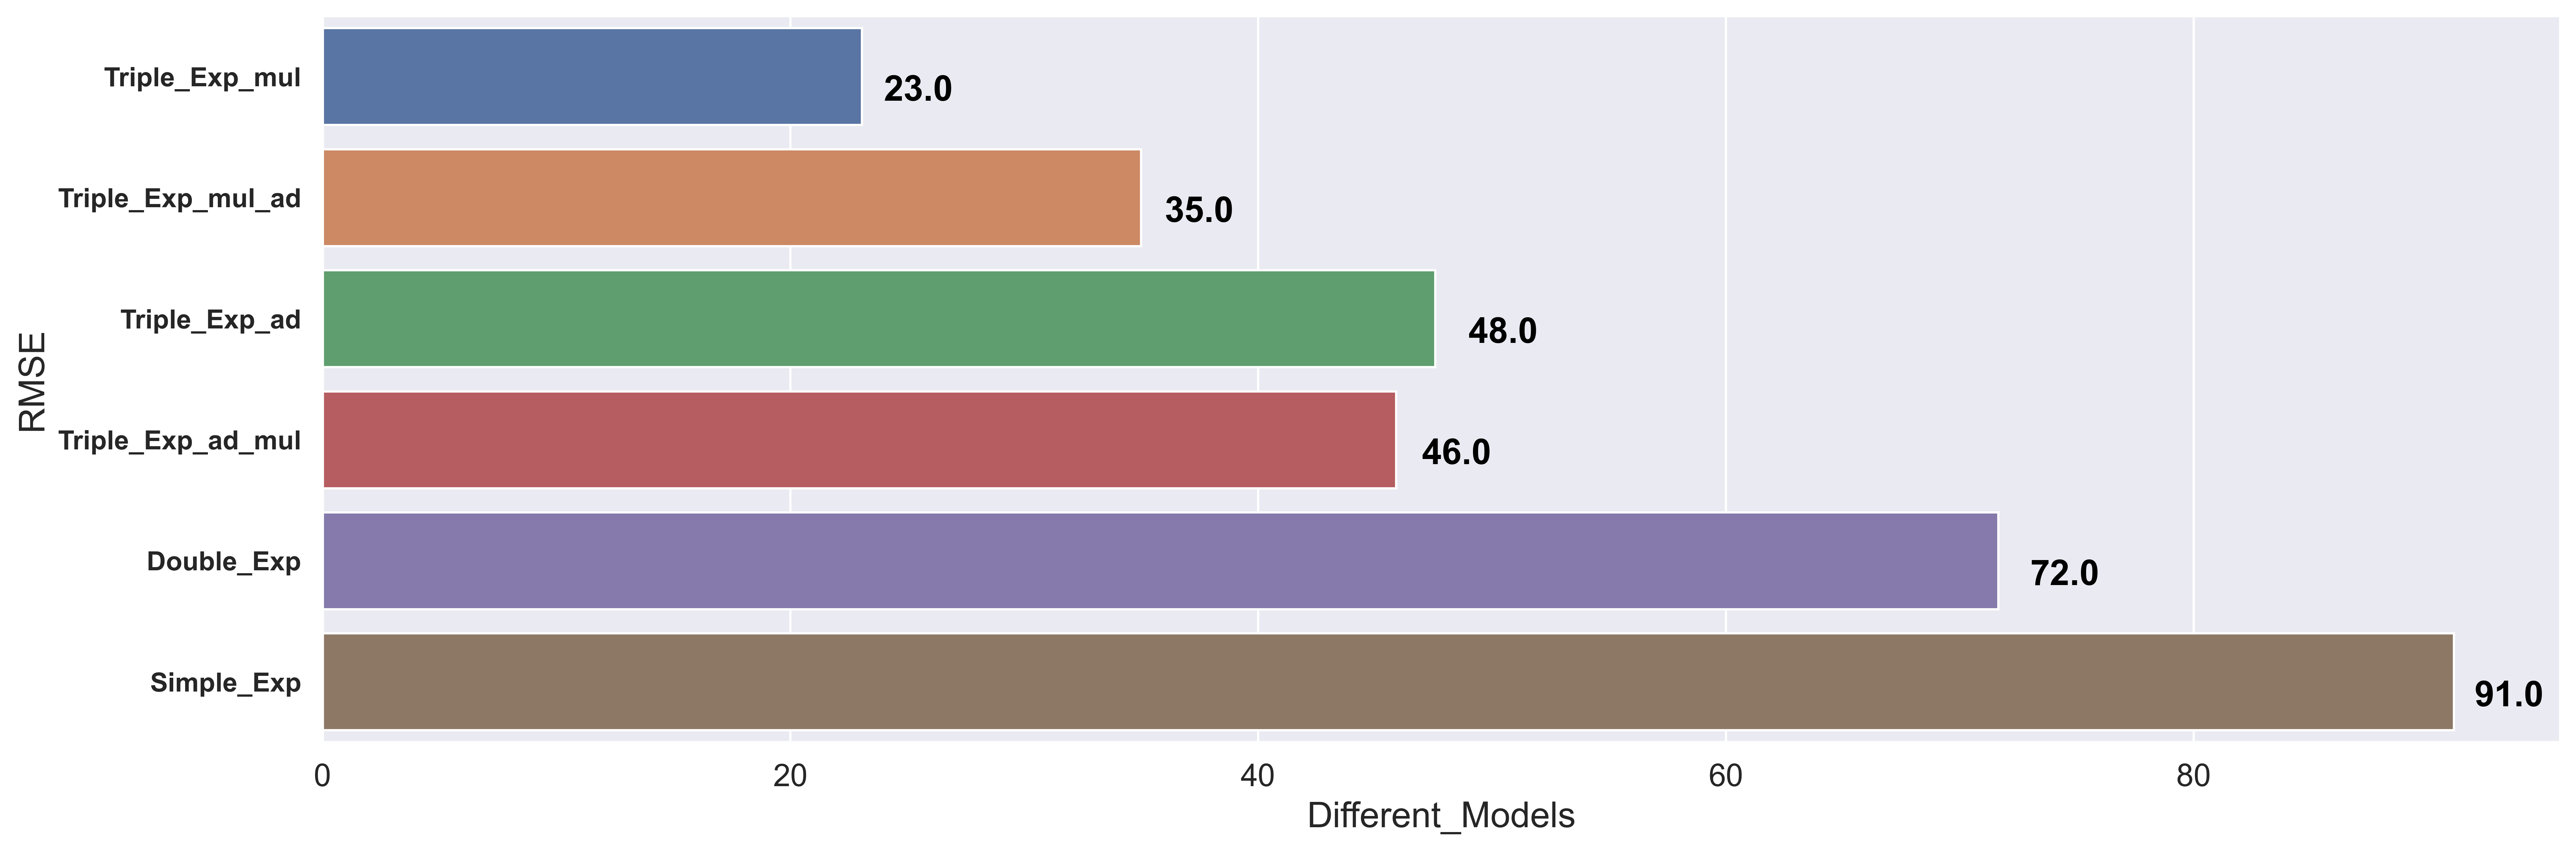

In [43]:
f, axe = plt.subplots(1,1, figsize = (18,6), dpi = 500)
sns.barplot(x = 'Test_RMSE_Values', y = 'Models', data = table_evaluation, ax = axe)
axe.set_xlabel('Different_Models', size = 16)
axe.set_ylabel('RMSE', size = 16)
plt.yticks(fontsize = 12, fontweight = 'bold')
plt.xticks(fontsize = 14)

for i, v in enumerate(np.round(table_evaluation.Test_RMSE_Values.values,0)):
    axe.text(v + 1, i + .20, str(v), color = 'black', fontweight = 'bold', fontsize = 16)
plt.show()

# Autoregressive Integrated Moving Averages (ARIMA)

### Test of Stationarity
As we have yearly data the window size for moving average is equal to 12

In [44]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    movingAverage = timeseries.rolling(window=12).mean()
    movingSTD = timeseries.rolling(window=12).std()
    orig = plt.plot(timeseries, color='blue', label='Original')
    mean = plt.plot(movingAverage, color='red', label='Rolling Mean')
    plt.legend(loc='best')
    plt.title('Rolling Mean')
    plt.show(block=False)
    print('Results of Dickey Fuller Test:')
    dftest = adfuller(timeseries['Passengers'], autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

### Augmented Dicky Fuller Test
Null Hypothesis (H0): The series is not stationary             
p-val > 0.05

Alternate Hypothesis (H1): The series is stationary                   
p-val <= 0.05

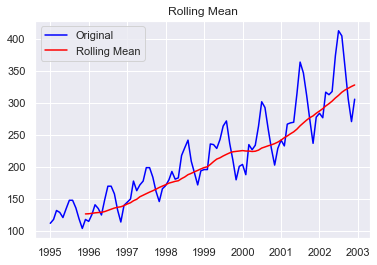

Results of Dickey Fuller Test:
Test Statistic                  1.340248
p-value                         0.996825
#Lags Used                     12.000000
Number of Observations Used    83.000000
Critical Value (1%)            -3.511712
Critical Value (5%)            -2.897048
Critical Value (10%)           -2.585713
dtype: float64


In [45]:
sales= pd.DataFrame()
sales['Passengers'] = df1[['Passengers']]
test_stationarity(sales)

In [46]:
def adf_test(series):    
    result = adfuller(series.dropna())  
    labels = ['ADF test statistic','p-value','# lags used','# observations']
    out = pd.Series(result[0:4],index=labels)
    if result[1] <= 0.05:
        print("Reject the null hypothesis")
        print("Data is stationary")
    else:
        print("Fail to reject the null hypothesis")
        print("Data is non-stationary")

In [47]:
adf_test(sales)

Fail to reject the null hypothesis
Data is non-stationary


### Feature Scaling (Transformations)
Square Root Transform

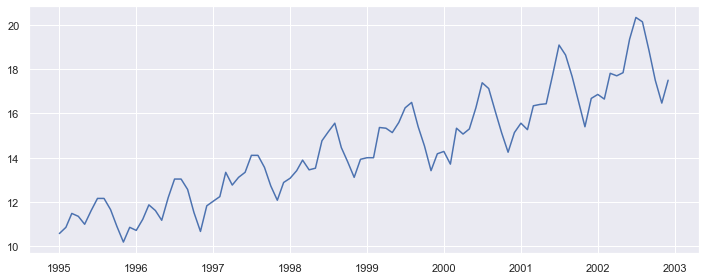

In [48]:
square_root= pd.DataFrame()
square_root = df1[['Passengers']]
square_root['Passengers'] = np.sqrt(square_root.Passengers)
fig=plt.figure(figsize=(12,10))
plt.subplot(211)
plt.plot(square_root['Passengers'])
plt.show()

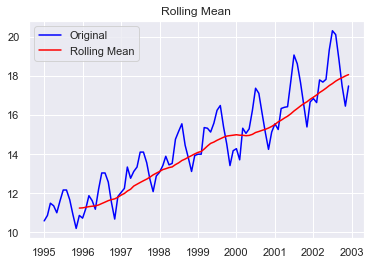

Results of Dickey Fuller Test:
Test Statistic                  0.451435
p-value                         0.983320
#Lags Used                     12.000000
Number of Observations Used    83.000000
Critical Value (1%)            -3.511712
Critical Value (5%)            -2.897048
Critical Value (10%)           -2.585713
dtype: float64


In [49]:
test_stationarity(square_root)

In [50]:
adf_test(square_root)

Fail to reject the null hypothesis
Data is non-stationary


### Log Transform

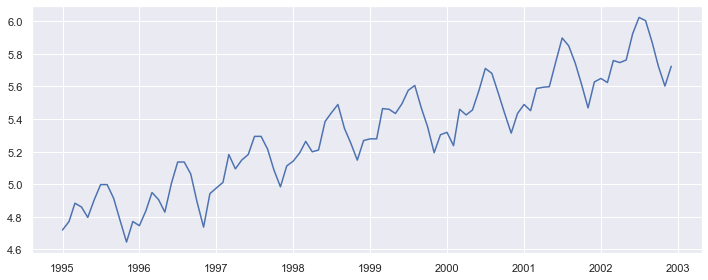

In [51]:
log = pd.DataFrame()
log = df1[['Passengers']]
log['Passengers'] = np.log(log.Passengers)
fig=plt.figure(figsize=(12,10))
plt.subplot(211)
plt.plot(log['Passengers'])
plt.show()

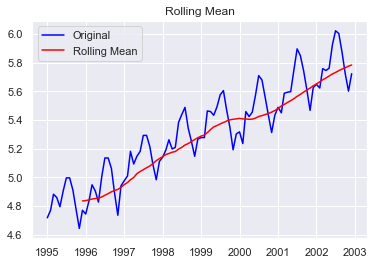

Results of Dickey Fuller Test:
Test Statistic                 -0.723027
p-value                         0.840695
#Lags Used                     12.000000
Number of Observations Used    83.000000
Critical Value (1%)            -3.511712
Critical Value (5%)            -2.897048
Critical Value (10%)           -2.585713
dtype: float64


In [52]:
test_stationarity(log)

In [53]:
adf_test(log)

Fail to reject the null hypothesis
Data is non-stationary


###### Hence, the Time series data is Non-Stationary
### Converting Non-Stationary Time Series into Stationary
# Differencing                 
Applying differencing on our series and plotting the results:

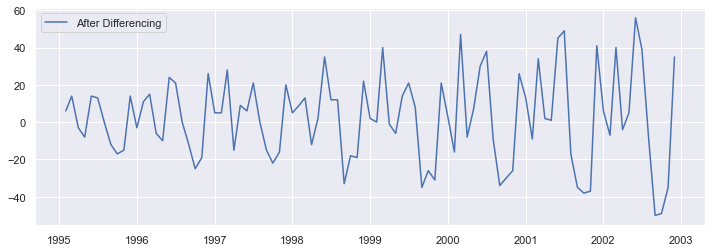

In [54]:
differencing = df1 - df1.shift(1)
differencing.dropna(inplace=True)
plt.figure(figsize=(12,4))
plt.plot(differencing, label='After Differencing')
plt.legend(loc='best')
plt.show()

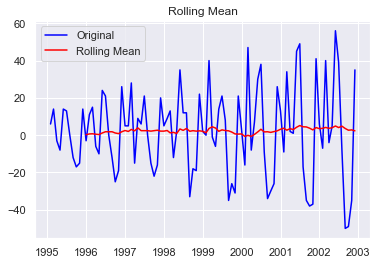

Results of Dickey Fuller Test:
Test Statistic                 -2.150002
p-value                         0.224889
#Lags Used                     12.000000
Number of Observations Used    82.000000
Critical Value (1%)            -3.512738
Critical Value (5%)            -2.897490
Critical Value (10%)           -2.585949
dtype: float64


In [55]:
test_stationarity(differencing)

In [56]:
adf_test(differencing)

Fail to reject the null hypothesis
Data is non-stationary


### Seasonal Differencing

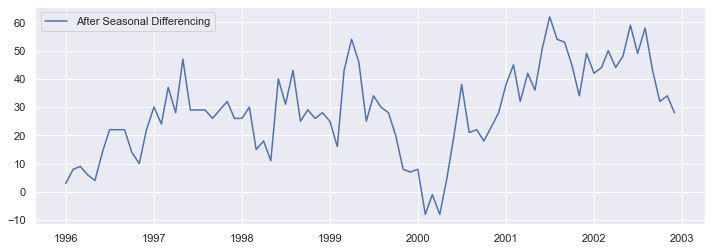

In [57]:
seasonal_differencing = df1 - df1.shift(12)
seasonal_differencing.dropna(inplace=True)
plt.figure(figsize=(12,4))
plt.plot(seasonal_differencing, label='After Seasonal Differencing')
plt.legend(loc='best')
plt.show()

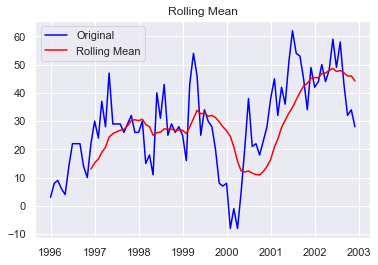

Results of Dickey Fuller Test:
Test Statistic                 -2.690004
p-value                         0.075784
#Lags Used                      1.000000
Number of Observations Used    82.000000
Critical Value (1%)            -3.512738
Critical Value (5%)            -2.897490
Critical Value (10%)           -2.585949
dtype: float64


In [58]:
test_stationarity(seasonal_differencing)

In [59]:
adf_test(seasonal_differencing)

Fail to reject the null hypothesis
Data is non-stationary


### Transformation
Transformations are used to stabilize the non-constant variance of a series. Common transformation methods include power transform, square root, and log transform. Let’s do a quick log transform and differencing on our air passenger dataset:

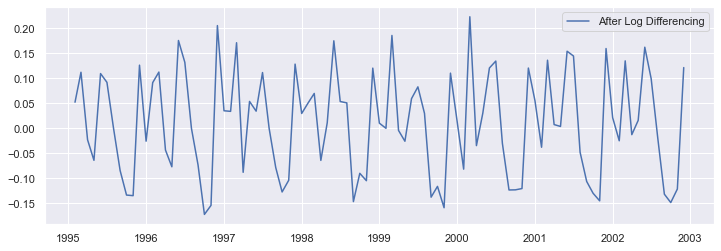

In [60]:
log_diff = log - log.shift(1)
log_diff.dropna(inplace=True)
plt.figure(figsize=(12,4))
plt.plot(log_diff, label='After Log Differencing')
plt.legend(loc='best')
plt.show()

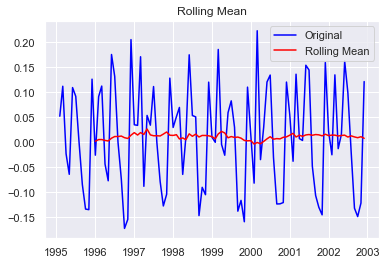

Results of Dickey Fuller Test:
Test Statistic                 -2.670823
p-value                         0.079225
#Lags Used                     12.000000
Number of Observations Used    82.000000
Critical Value (1%)            -3.512738
Critical Value (5%)            -2.897490
Critical Value (10%)           -2.585949
dtype: float64


In [61]:
test_stationarity(log_diff)

In [62]:
adf_test(log_diff)

Fail to reject the null hypothesis
Data is non-stationary


### Box Cox Transformation

,Passengers
Date,
1995-01-01,4.718499
1995-02-01,4.770685
1995-03-01,4.882802
1995-04-01,4.859812
1995-05-01,4.795791


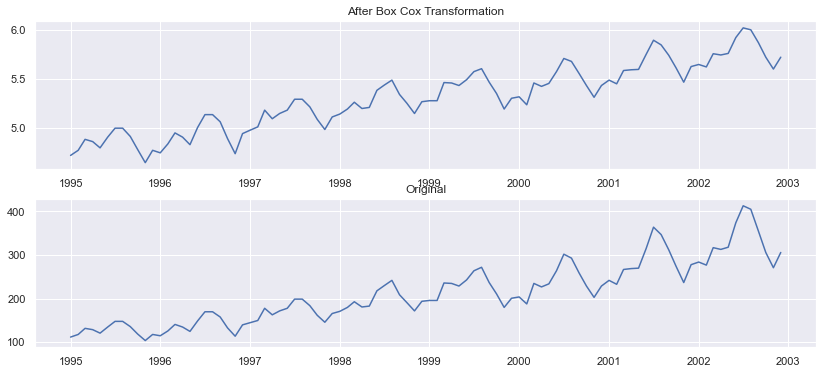

In [63]:
from scipy.stats import boxcox
data_boxcox = pd.DataFrame()
data_boxcox['Passengers'] = pd.Series(boxcox(df1['Passengers'], lmbda=0), df1.index)
display(data_boxcox.head())
fig, axis = plt.subplots(2,figsize=(14,6),)
axis[0].plot(data_boxcox)
axis[0].set_title('After Box Cox Transformation')
axis[1].plot(df1, label='original')
axis[1].set_title('Original')
plt.show()

### Observation
We can see the variance became almost constant after the transformation. Both in the earlier and later years the variance is almost similar.                         
But we can see that still the series has an upward trend. So, the mean is not constant yet. Hence, we need to do Differencing for making the mean constant.

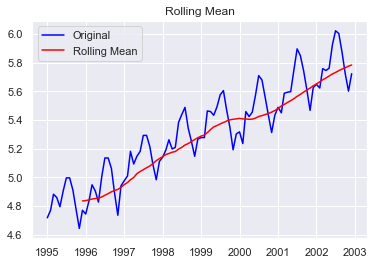

Results of Dickey Fuller Test:
Test Statistic                 -0.723027
p-value                         0.840695
#Lags Used                     12.000000
Number of Observations Used    83.000000
Critical Value (1%)            -3.511712
Critical Value (5%)            -2.897048
Critical Value (10%)           -2.585713
dtype: float64


In [64]:
test_stationarity(data_boxcox)

In [65]:
adf_test(data_boxcox)

Fail to reject the null hypothesis
Data is non-stationary


### Differencing of the Box-Cox Transformation
Differencing is performed by subtracting the previous observation from the current observation.

Differencing removes trend and seasonality in a Time series. When an entire cycle is used for differencing the other cycle, then the seasonality is removed.

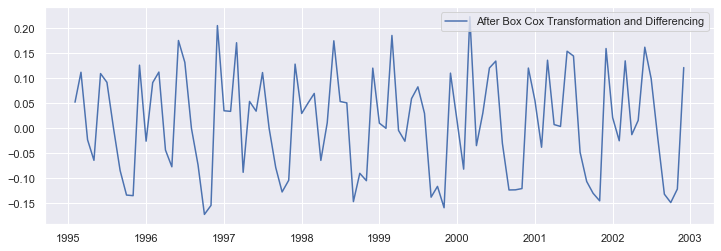

In [66]:
data_boxcox_diff = data_boxcox - data_boxcox.shift()
data_boxcox_diff.dropna(inplace=True)
plt.figure(figsize=(12,4))
plt.plot(data_boxcox_diff, label='After Box Cox Transformation and Differencing')
plt.legend(loc='best')
plt.show()

### Observation
We can see that there is no trend (upward or downward) after differencing on the Box Cox transformation.               
It is a horizontal trend.               
The mean became constant. The mean is zero.                   
Also, the variance is almost constant.                 

Lets test the Stationarity again.                  

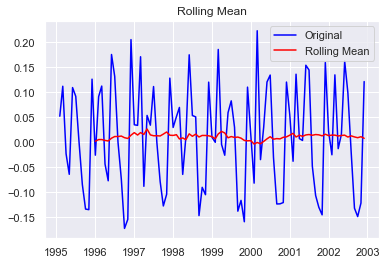

Results of Dickey Fuller Test:
Test Statistic                 -2.670823
p-value                         0.079225
#Lags Used                     12.000000
Number of Observations Used    82.000000
Critical Value (1%)            -3.512738
Critical Value (5%)            -2.897490
Critical Value (10%)           -2.585949
dtype: float64


In [67]:
test_stationarity(data_boxcox_diff)

In [68]:
adf_test(data_boxcox_diff)

Fail to reject the null hypothesis
Data is non-stationary


##### Finally, Our Series is now stationary for AR Forecasting with a very less p-value
# ARIMA Hyperparameter Tuning

In [69]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
def evaluate_arima_model(X, arima_order):
    X = X.astype('float32')
    train_size = int(len(X) * 0.70)
    train, test = X[0:train_size], X[train_size:]
    history = [x for x in train]
    predictions = list()
    for t in range(len(test)):
        model = ARIMA(history, order=arima_order)
        model_fit = model.fit()
        yhat = model_fit.forecast()[0]
        predictions.append(yhat)
        history.append(test[t])
    rmse = sqrt(mean_squared_error(test, predictions))
    return rmse

In [70]:
def evaluate_models(dataset, p_values, d_values, q_values):
    dataset = dataset.astype('float32')
    best_score, best_cfg = float('inf'), None
    for p in p_values:
        for d in d_values:
            for q in q_values:
                order = (p,d,q)
                try:
                    rmse = evaluate_arima_model(dataset, order)
                    if rmse < best_score:
                        best_score, best_cfg = rmse, order
                except Exception as e:
                    print(e)
                    continue
    print('Best ARIMA%s RMSE=%.3f' % (best_cfg, best_score))

In [71]:
p_values = range(0, 5)
d_values = range(0, 5)
q_values = range(0, 5)
evaluate_models(data_boxcox_diff.Passengers, p_values, d_values, q_values)

C:\Users\BHANUKIRAN\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\BHANUKIRAN\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\BHANUKIRAN\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\BHANUKIRAN\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\BHANUKIRAN\anaconda3\lib\site-packages\statsmodels\base\model.py:604: C

C:\Users\BHANUKIRAN\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\BHANUKIRAN\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\BHANUKIRAN\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\BHANUKIRAN\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\BHANUKIRAN\anaconda3\lib\site-packages\statsmodels\base\model.py:604: C

C:\Users\BHANUKIRAN\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\BHANUKIRAN\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\BHANUKIRAN\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\BHANUKIRAN\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\BHANUKIRAN\anaconda3\lib\site-packages\statsmodels\base\model.py:604: C

KeyboardInterrupt: 

### Building The Time Series Forecasting with Optimal Value using ARIMA
Automatically performs the Differencing if the series has trend.

Hence, no need to manually perform the differencing.

In [72]:
train_data_boxcox = data_boxcox[:72]
test_data_boxcox = data_boxcox[72:]
train_data_boxcox_diff = data_boxcox_diff[:72]
test_data_boxcox_diff = data_boxcox_diff[72:]

### Inverse transformation of the Box-Cox Differencing
As we have converted the original time series to Stationary series by consecutively applying BoxCox transformation and Differencing. We have to transform the series back to the original one (step by step).

In [73]:
model = ARIMA(train_data_boxcox_diff, order=(4, 1, 4))
model_fit = model.fit()
y_hat_ar = data_boxcox_diff.copy()
y_hat_ar['arima_forecast'] = model_fit.predict(data_boxcox_diff.index.min(), data_boxcox_diff.index.max())
y_hat_ar['arima_forecast'] = y_hat_ar['arima_forecast'].cumsum()
y_hat_ar['arima_forecast'] = y_hat_ar['arima_forecast'].add(data_boxcox.Passengers[0])
y_hat_ar['arima_forecast'] = np.exp(y_hat_ar['arima_forecast'])

C:\Users\BHANUKIRAN\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\BHANUKIRAN\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\BHANUKIRAN\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\BHANUKIRAN\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


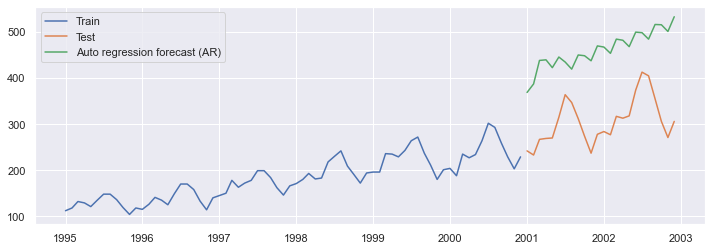

In [74]:
plt.figure(figsize=(12,4))
plt.plot(train_data['Passengers'], label='Train')
plt.plot(test_data, label='Test')
plt.plot(y_hat_ar['arima_forecast'][test_data.index.min():], label='Auto regression forecast (AR)')
plt.legend(loc='best')
plt.show()

### Observation
We can see that we have done moderately well.
No Seasonality captured. Only Trend has been captured
# Model Evaluation
RMSE (Root Mean Squared Error)

In [75]:
rmse_ARIMA = np.sqrt(mean_squared_error(test_data, y_hat_ar['arima_forecast'][test_data.index.min():])).round(2)
rmse_ARIMA

161.33

### MAPE (Mean Absolute Percent Error)

In [76]:
mape_arima = round(np.mean(np.abs((test_data.Passengers - y_hat_ar['arima_forecast'][test_data.index.min():])/test_data.Passengers)*100),2)
mape_arima

53.2

### Observation
We can see that AR model has done reasonably good job but not better than Holt's method.             
We souldn't compare it with Holt's method. Because Holt's method captures seasonality                                
### Analysing the Residuals
The mean of the Residual should be zero or close to Zero

In [77]:
model_residual = model_fit.resid
model_residual.mean()

-0.005854564717745193

### Residuals must be stationary

In [78]:
adf_test(model_residual)

Fail to reject the null hypothesis
Data is non-stationary


### No autocorrelation between residuals

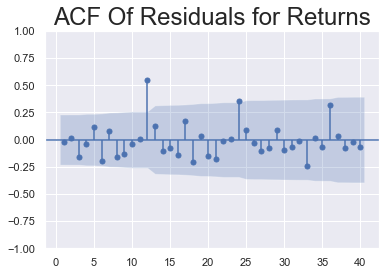

In [79]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(model_residual, zero = False, lags = 40)
plt.title("ACF Of Residuals for Returns",size=24)
plt.show()

#### Residuals must be random

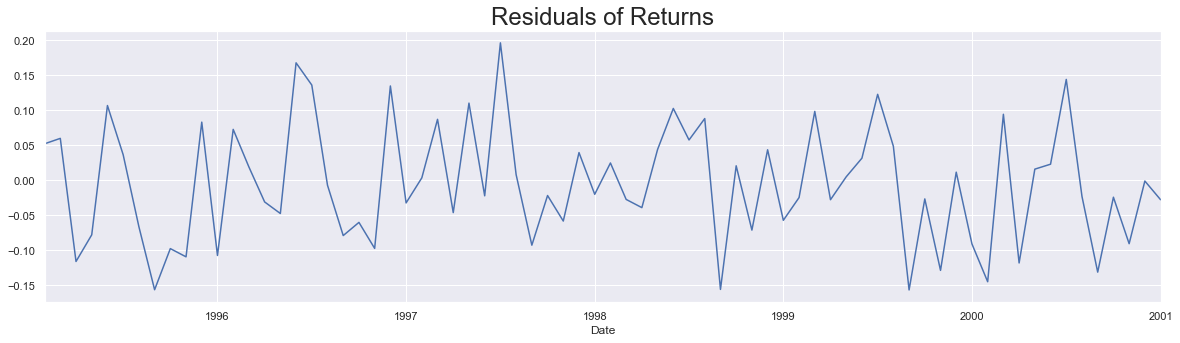

In [80]:
model_residual.plot(figsize=(20,5))
plt.title("Residuals of Returns", size=24)
plt.show()

### Seasonal Auto Regressive Integrated Moving Average (SARIMA)
ARIMA with Seasonal component added.

In [81]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [82]:
model = SARIMAX(train_data_boxcox, order=(1,1,1), seasonal_order=(1,1,1,12))
model_fit= model.fit()
y_hat_sarima = data_boxcox_diff.copy()

C:\Users\BHANUKIRAN\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\BHANUKIRAN\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


### Inverse Transformation of the Differencing Box-Cox Transformation
Note that ARIMAM automatically takes care of the reversing of Differencing (takes care the Integration part automatically). So, we don't need to perform the cumsum here. We only have to do the reverse of the log boc cox transformation.

In ARIMA, we had to perform the cumsum manually.

In [83]:
y_hat_sarima['sarima_forecast_boxcox'] = model_fit.predict(data_boxcox_diff.index.min(), data_boxcox_diff.index.max())
y_hat_sarima['sarima_forecast'] = np.exp(y_hat_sarima['sarima_forecast_boxcox'])
y_hat_sarima['sarima_forecast'] = np.exp(y_hat_sarima['sarima_forecast_boxcox'])

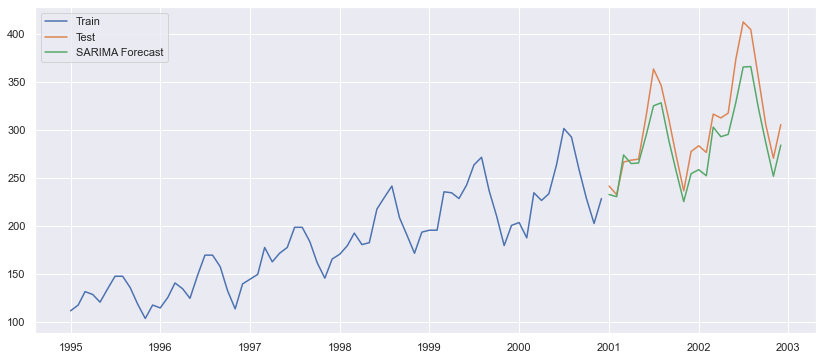

In [84]:
plt.figure(figsize=(14,6))
plt.plot(train_data['Passengers'], label='Train')
plt.plot(test_data, label='Test')
plt.plot(y_hat_sarima['sarima_forecast'][test_data.index.min():], label='SARIMA Forecast')
plt.legend(loc='best')
plt.show()

We can see that we are able to capture the trend and seasonality both.
### Model Evaluation

RMSE (Root Mean Squared Error)

In [85]:
rmse_SARIMA = np.sqrt(mean_squared_error(test_data, y_hat_sarima['sarima_forecast'][test_data.index.min():])).round(2)
rmse_SARIMA

24.1

### MAPE (Mean Absolute Percent Error)

In [86]:
mape_sarima = round(np.mean(np.abs((test_data.Passengers - y_hat_sarima['sarima_forecast'][test_data.index.min():])/test_data.Passengers)*100),2)
mape_sarima

6.47

### Observation:
SARIMA method has done reasonably well as it captures seasonality.                             
The performance is comparable with the other methods such as Holt's Winter additive/multiplicative, whcich also captures seasonality. |                        
### Analysing the Residuals
The mean of the Residual should be zero or close to Zero

In [87]:
model_residual = model_fit.resid
model_residual.mean()

0.03585484451906838

#### Residuals must be stationary

In [88]:
adf_test(model_residual)

Reject the null hypothesis
Data is stationary


### No autocorrelation between residuals

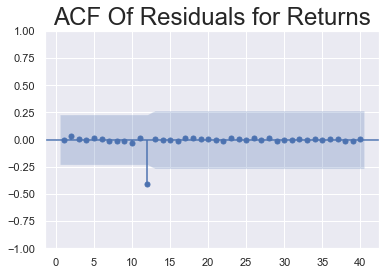

In [89]:
plot_acf(model_residual, zero = False, lags = 40)
plt.title("ACF Of Residuals for Returns",size=24)
plt.show()

#### Residuals must be random

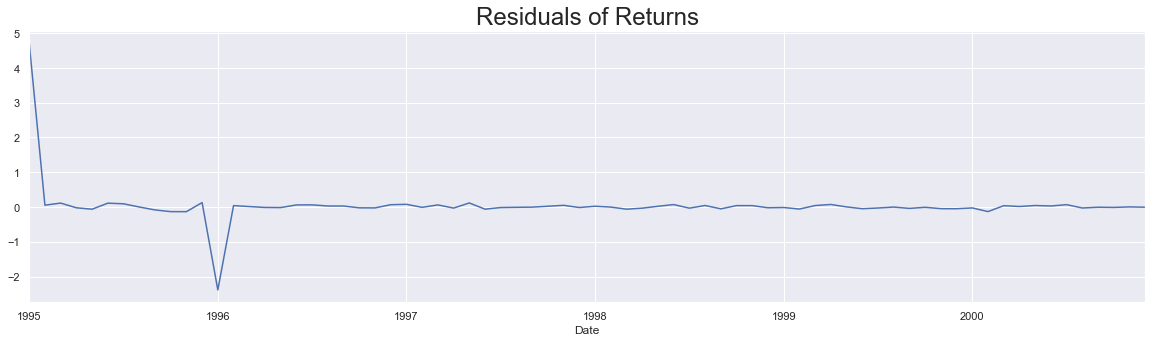

In [90]:
model_residual.plot(figsize=(20,5))
plt.title("Residuals of Returns", size=24)
plt.show()

### Creating model with differente Transformation Technique

In [91]:
Evaluation = {"Models"     :pd.Series(["Simple_Exponential","Double_Exponential","Triple_Exp_additive","Triple_Exp_mul_ad",
                                       "Triple_Exp_ad_mul","Triple_Exp_multiplicative","ARIMA","SARIMA"]),\
              "MAPE(%)"    :pd.Series([mape_ses, mape_dexp, mape_ad_texp, mape_mul_ad_texp, mape_ad_mul_texp, 
                                       mape_mul_texp, mape_arima, mape_sarima]),
              "RMSE_Values":pd.Series([test_rmse_ses, test_rmse_dexp, test_rmse_ad_texp, test_rmse_mul_ad_texp, 
                                       test_rmse_ad_mul_texp, test_rmse_mul_texp, rmse_ARIMA, rmse_SARIMA])}
table_evaluation=pd.DataFrame(Evaluation)
table_evaluation.sort_values(['RMSE_Values'], inplace=True, ignore_index=True)
table_evaluation

,Models,MAPE(%),RMSE_Values
0,Triple_Exp_multiplicative,6.035068,23.058821
1,SARIMA,6.470000,24.100000
2,Triple_Exp_mul_ad,9.368507,34.989901
3,Triple_Exp_ad_mul,12.720039,45.891606
4,Triple_Exp_additive,12.084271,47.568531
5,Double_Exponential,17.149026,71.634778
6,Simple_Exponential,23.382283,91.113254
7,ARIMA,53.200000,161.330000


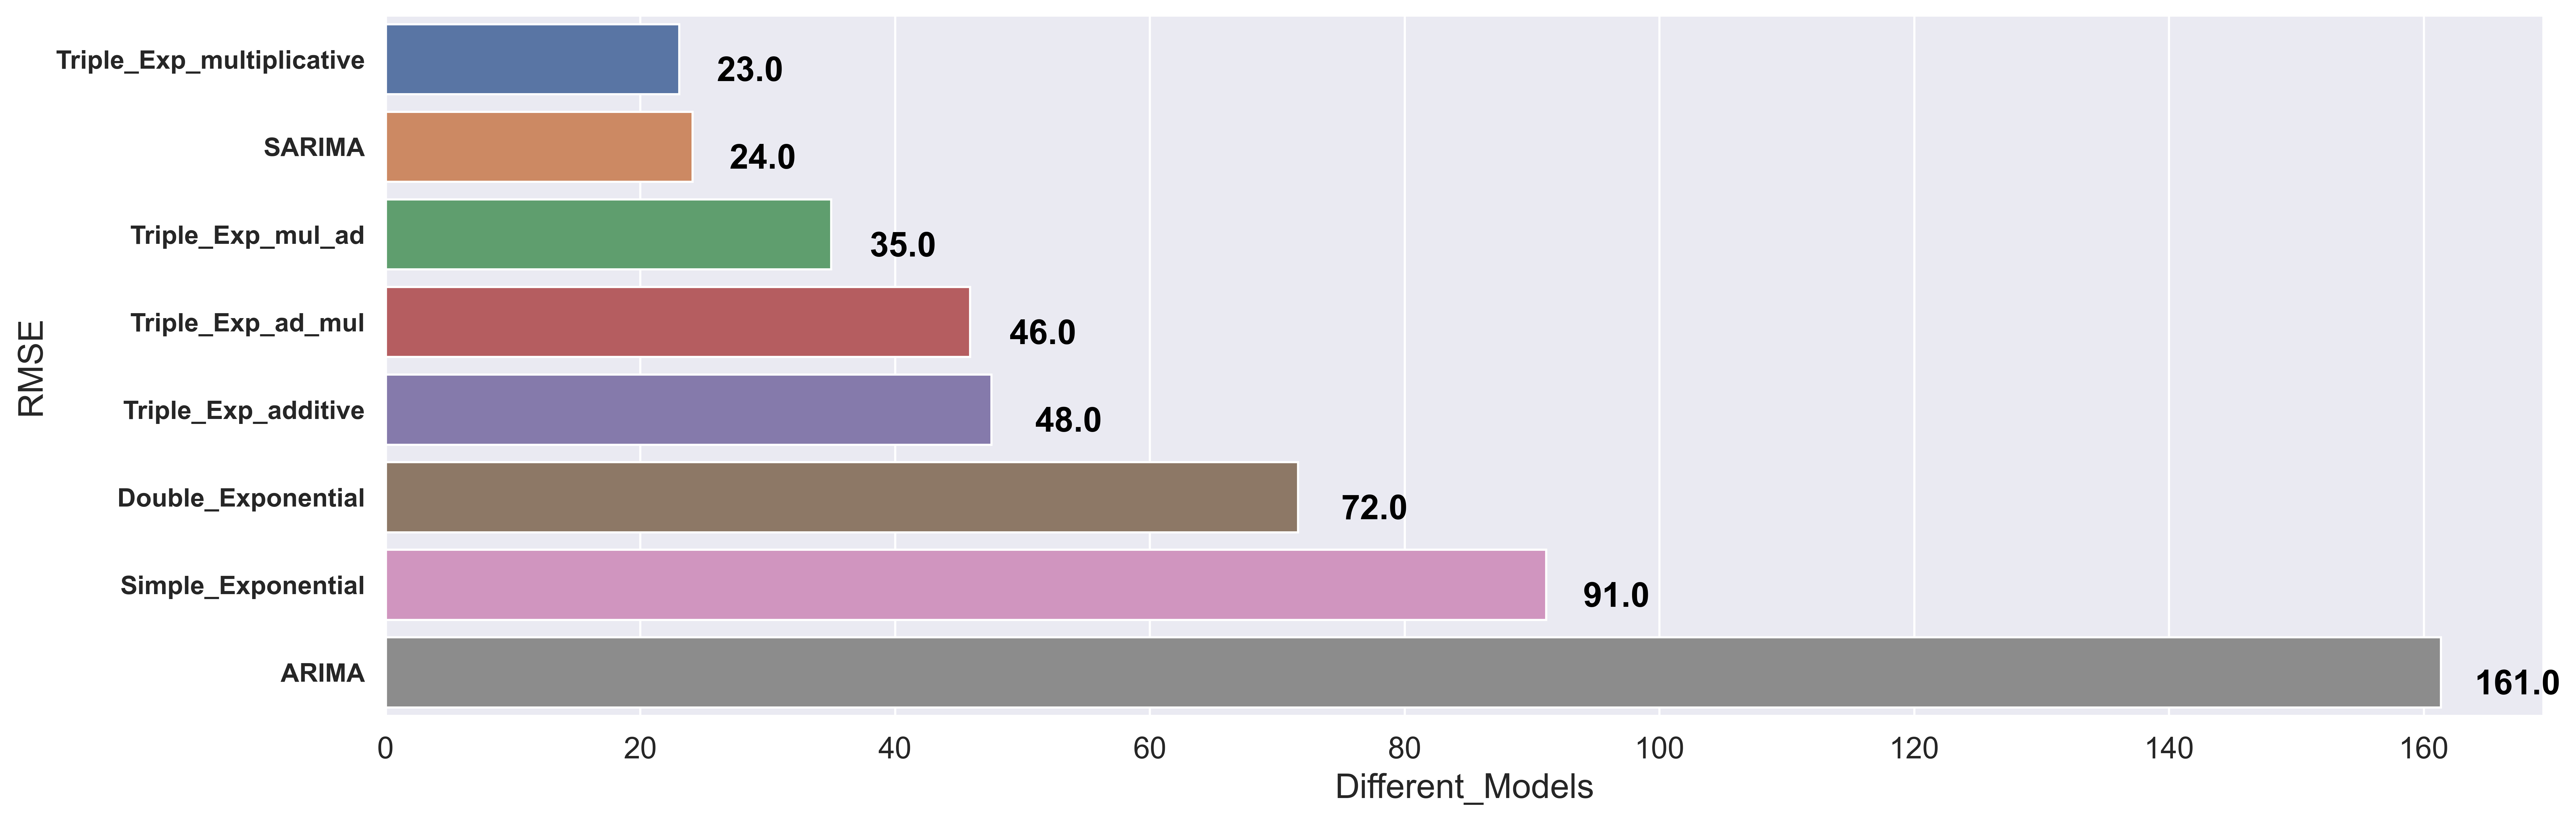

In [92]:
f, axe = plt.subplots(1,1, figsize=(18,6), dpi=500)
sns.barplot(x='RMSE_Values', y='Models', data=table_evaluation, ax = axe)
axe.set_xlabel('Different_Models', size=16)
axe.set_ylabel('RMSE', size=16)
plt.yticks(fontsize=12,fontweight = 'bold')
plt.xticks(fontsize=14)

for i, v in enumerate(np.round(table_evaluation.RMSE_Values.values,0)):
    axe.text(v + 3, i + .25, str(v), color = 'black', fontweight = 'bold', fontsize= 16)
plt.show()

### Observation:
The Sarima Model did very well as compared to other Models but Holts-Winter Method did slightly better Note:Sarima with Hyperparameter tuning may get better results                          
Even in methods such as Triple Exponential Smoothing (Holts-Winters Method) taking Seasonality and Trend as Multiplicative gave the best restult in this case
### Data Pre-processing for Model Driven Techniques
Creating Dummy Variables of the Categorical Feature Month of Date Time feature

In [93]:
airlines = df1.copy()
airlines.reset_index(inplace = True)
airlines['t'] = np.arange(1, len(airlines) + 1)
airlines['t_squared'] = np.square(airlines.t)
airlines["month"] = airlines.Date.dt.strftime("%b")
airlines["year"] = airlines.Date.dt.strftime("%Y")
months = pd.get_dummies(airlines['month'])
months = months[['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']]
airlines = pd.concat([airlines, months], axis = 1)
airlines['log_passengers'] = np.log(airlines['Passengers'])
airlines

,Date,Passengers,t,t_squared,month,year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,log_passengers
0,1995-01-01,112,1,1,Jan,1995,1,0,0,0,0,0,0,0,0,0,0,0,4.718499
1,1995-02-01,118,2,4,Feb,1995,0,1,0,0,0,0,0,0,0,0,0,0,4.770685
2,1995-03-01,132,3,9,Mar,1995,0,0,1,0,0,0,0,0,0,0,0,0,4.882802
3,1995-04-01,129,4,16,Apr,1995,0,0,0,1,0,0,0,0,0,0,0,0,4.859812
4,1995-05-01,121,5,25,May,1995,0,0,0,0,1,0,0,0,0,0,0,0,4.795791
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,2002-08-01,405,92,8464,Aug,2002,0,0,0,0,0,0,0,1,0,0,0,0,6.003887
92,2002-09-01,355,93,8649,Sep,2002,0,0,0,0,0,0,0,0,1,0,0,0,5.872118
93,2002-10-01,306,94,8836,Oct,2002,0,0,0,0,0,0,0,0,0,1,0,0,5.723585
94,2002-11-01,271,95,9025,Nov,2002,0,0,0,0,0,0,0,0,0,0,1,0,5.602119


### Splitting data into Train and Test

In [94]:
train_data = airlines.iloc[:72]
test_data = airlines.iloc[72:]

In [95]:
train_data

,Date,Passengers,t,t_squared,month,year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,log_passengers
0,1995-01-01,112,1,1,Jan,1995,1,0,0,0,0,0,0,0,0,0,0,0,4.718499
1,1995-02-01,118,2,4,Feb,1995,0,1,0,0,0,0,0,0,0,0,0,0,4.770685
2,1995-03-01,132,3,9,Mar,1995,0,0,1,0,0,0,0,0,0,0,0,0,4.882802
3,1995-04-01,129,4,16,Apr,1995,0,0,0,1,0,0,0,0,0,0,0,0,4.859812
4,1995-05-01,121,5,25,May,1995,0,0,0,0,1,0,0,0,0,0,0,0,4.795791
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67,2000-08-01,293,68,4624,Aug,2000,0,0,0,0,0,0,0,1,0,0,0,0,5.680173
68,2000-09-01,259,69,4761,Sep,2000,0,0,0,0,0,0,0,0,1,0,0,0,5.556828
69,2000-10-01,229,70,4900,Oct,2000,0,0,0,0,0,0,0,0,0,1,0,0,5.433722
70,2000-11-01,203,71,5041,Nov,2000,0,0,0,0,0,0,0,0,0,0,1,0,5.313206


In [96]:
test_data

,Date,Passengers,t,t_squared,month,year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,log_passengers
72,2001-01-01,242,73,5329,Jan,2001,1,0,0,0,0,0,0,0,0,0,0,0,5.488938
73,2001-02-01,233,74,5476,Feb,2001,0,1,0,0,0,0,0,0,0,0,0,0,5.451038
74,2001-03-01,267,75,5625,Mar,2001,0,0,1,0,0,0,0,0,0,0,0,0,5.587249
75,2001-04-01,269,76,5776,Apr,2001,0,0,0,1,0,0,0,0,0,0,0,0,5.594711
76,2001-05-01,270,77,5929,May,2001,0,0,0,0,1,0,0,0,0,0,0,0,5.598422
77,2001-06-01,315,78,6084,Jun,2001,0,0,0,0,0,1,0,0,0,0,0,0,5.752573
78,2001-07-01,364,79,6241,Jul,2001,0,0,0,0,0,0,1,0,0,0,0,0,5.897154
79,2001-08-01,347,80,6400,Aug,2001,0,0,0,0,0,0,0,1,0,0,0,0,5.849325
80,2001-09-01,312,81,6561,Sep,2001,0,0,0,0,0,0,0,0,1,0,0,0,5.743003
81,2001-10-01,274,82,6724,Oct,2001,0,0,0,0,0,0,0,0,0,1,0,0,5.613128


### Building Linear Regression Model

In [97]:
import statsmodels.formula.api as smf 

linear_model = smf.ols('Passengers~t', data = train_data).fit()
pred_linear =  pd.Series(linear_model.predict(pd.DataFrame(test_data['t'])))
rmse_linear = np.sqrt(np.mean((np.array(test_data['Passengers']) - np.array(pred_linear))**2))
rmse_linear

51.667792995646266

In [98]:
linear_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Passengers   R-squared:                       0.757
Model:                            OLS   Adj. R-squared:                  0.753
Method:                 Least Squares   F-statistic:                     217.9
Date:                Sun, 23 Oct 2022   Prob (F-statistic):           3.50e-23
Time:                        16:34:50   Log-Likelihood:                -329.04
No. Observations:                  72   AIC:                             662.1
Df Residuals:                      70   BIC:                             666.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    110.5243      5.643     19.586      0.000      99.270     121.779
t              1.9830      0.134     14.760      0.000       1.715       2.251
==============================================================================
Omnibus:                        0.634   Durbin-Watson:                   0.659
Prob(Omnibus):                  0.728   Jarque-Bera (JB):                0.667
Skew:                           0.213   Prob(JB):                        0.717
Kurtosis:                       2.799   Cond. No.                         84.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [99]:
#Exponential

exp = smf.ols('log_passengers~t', data = train_data).fit()
pred_exp = pd.Series(exp.predict(pd.DataFrame(test_data['t'])))
rmse_exp = np.sqrt(np.mean((np.array(test_data['Passengers']) - np.array(np.exp(pred_exp)))**2))
rmse_exp

42.552328946004586

In [100]:
exp.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         log_passengers   R-squared:                       0.779
Model:                            OLS   Adj. R-squared:                  0.776
Method:                 Least Squares   F-statistic:                     246.3
Date:                Sun, 23 Oct 2022   Prob (F-statistic):           1.28e-24
Time:                        16:34:50   Log-Likelihood:                 48.708
No. Observations:                  72   AIC:                            -93.42
Df Residuals:                      70   BIC:                            -88.86
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      4.7699      0.030    160.519      0.000       4.711       4.829
t              0.0111      0.001     15.693      0.000       0.010       0.013
==============================================================================
Omnibus:                        2.000   Durbin-Watson:                   0.687
Prob(Omnibus):                  0.368   Jarque-Bera (JB):                1.573
Skew:                          -0.186   Prob(JB):                        0.456
Kurtosis:                       2.378   Cond. No.                         84.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [101]:
#Quadratic 

quad = smf.ols('Passengers ~ t+t_squared', data = train_data).fit()
pred_quad = pd.Series(quad.predict(test_data[["t", "t_squared"]]))
rmse_quad = np.sqrt(np.mean((np.array(test_data['Passengers']) - np.array(pred_quad))**2))
rmse_quad

51.99073640155471

In [102]:
quad.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Passengers   R-squared:                       0.757
Model:                            OLS   Adj. R-squared:                  0.750
Method:                 Least Squares   F-statistic:                     107.4
Date:                Sun, 23 Oct 2022   Prob (F-statistic):           6.52e-22
Time:                        16:34:51   Log-Likelihood:                -329.04
No. Observations:                  72   AIC:                             664.1
Df Residuals:                      69   BIC:                             670.9
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    110.2764      8.677     12.710      0.000      92.967     127.586
t              2.0031      0.549      3.652      0.001       0.909       3.097
t_squared     -0.0003      0.007     -0.038      0.970      -0.015       0.014
==============================================================================
Omnibus:                        0.649   Durbin-Watson:                   0.659
Prob(Omnibus):                  0.723   Jarque-Bera (JB):                0.679
Skew:                           0.216   Prob(JB):                        0.712
Kurtosis:                       2.799   Cond. No.                     7.29e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.29e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [103]:
#Additive seasonality 

add_sea = smf.ols('Passengers ~ Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov+Dec',data=train_data).fit()
pred_add_sea = pd.Series(add_sea.predict(test_data[['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']]))
rmse_add_sea = np.sqrt(np.mean((np.array(test_data['Passengers']) - np.array(pred_add_sea))**2))
rmse_add_sea

127.2645156532034

In [104]:
add_sea.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Passengers   R-squared:                       0.202
Model:                            OLS   Adj. R-squared:                  0.055
Method:                 Least Squares   F-statistic:                     1.379
Date:                Sun, 23 Oct 2022   Prob (F-statistic):              0.206
Time:                        16:34:51   Log-Likelihood:                -371.83
No. Observations:                  72   AIC:                             767.7
Df Residuals:                      60   BIC:                             795.0
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    168.8333      5.044     33.475      0.000     158.745     178.922
Jan          -11.6667     18.126     -0.644      0.522     -47.925      24.591
Feb           -9.1667     18.126     -0.506      0.615     -45.425      27.091
Mar           17.0000     18.126      0.938      0.352     -19.258      53.258
Apr            9.5000     18.126      0.524      0.602     -26.758      45.758
May            8.5000     18.126      0.469      0.641     -27.758      44.758
Jun           29.0000     18.126      1.600      0.115      -7.258      65.258
Jul           50.0000     18.126      2.758      0.008      13.742      86.258
Aug           51.8333     18.126      2.860      0.006      15.575      88.091
Sep           28.3333     18.126      1.563      0.123      -7.925      64.591
Oct            5.3333     18.126      0.294      0.770     -30.925      41.591
Nov          -15.6667     18.126     -0.864      0.391     -51.925      20.591
Dec            5.8333     18.126      0.322      0.749     -30.425      42.091
==============================================================================
Omnibus:                       29.671   Durbin-Watson:                   0.050
Prob(Omnibus):                  0.000   Jarque-Bera (JB):                4.962
Skew:                           0.033   Prob(JB):                       0.0837
Kurtosis:                       1.716   Cond. No.                     1.94e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.07e-31. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [105]:
#Additive Seasonality Quadratic 

add_sea_quad = smf.ols('Passengers ~ t+t_squared+Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov+Dec',data=train_data).fit()
pred_add_sea_quad = pd.Series(add_sea_quad.predict(test_data[['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec','t','t_squared']]))
rmse_add_sea_quad = np.sqrt(np.mean((np.array(test_data['Passengers']) - np.array(pred_add_sea_quad))**2))
rmse_add_sea_quad

35.241608485932964

In [106]:
add_sea_quad.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Passengers   R-squared:                       0.958
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     101.2
Date:                Sun, 23 Oct 2022   Prob (F-statistic):           7.45e-35
Time:                        16:34:52   Log-Likelihood:                -266.00
No. Observations:                  72   AIC:                             560.0
Df Residuals:                      58   BIC:                             591.9
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    101.8335      3.657     27.847      0.000      94.513     109.154
t              1.9472      0.250      7.802      0.000       1.448       2.447
t_squared      0.0009      0.003      0.259      0.797      -0.006       0.007
Jan           -6.2122      4.246     -1.463      0.149     -14.712       2.287
Feb           -5.7134      4.246     -1.346      0.184     -14.212       2.785
Mar           18.4504      4.246      4.345      0.000       9.951      26.949
Apr            8.9458      4.247      2.106      0.039       0.445      17.447
May            5.9395      4.248      1.398      0.167      -2.564      14.444
Jun           24.4315      4.250      5.748      0.000      15.923      32.940
Jul           43.4218      4.253     10.210      0.000      34.909      51.935
Aug           43.2437      4.256     10.161      0.000      34.724      51.763
Sep           17.7306      4.260      4.162      0.000       9.204      26.257
Oct           -7.2843      4.264     -1.708      0.093     -15.819       1.251
Nov          -30.3009      4.269     -7.098      0.000     -38.846     -21.756
Dec          -10.8192      4.274     -2.531      0.014     -19.375      -2.263
==============================================================================
Omnibus:                        1.717   Durbin-Watson:                   0.668
Prob(Omnibus):                  0.424   Jarque-Bera (JB):                1.039
Skew:                          -0.185   Prob(JB):                        0.595
Kurtosis:                       3.458   Cond. No.                     3.87e+19
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.67e-31. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [107]:
##Multiplicative Seasonality

mul_sea = smf.ols('log_passengers ~ Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov+Dec', data = train_data).fit()
pred_mult_sea = pd.Series(mul_sea.predict(test_data))
rmse_mult_sea = np.sqrt(np.mean((np.array(test_data['Passengers']) - np.array(np.exp(pred_mult_sea)))**2))
rmse_mult_sea

132.18762800263443

In [108]:
mul_sea.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         log_passengers   R-squared:                       0.189
Model:                            OLS   Adj. R-squared:                  0.040
Method:                 Least Squares   F-statistic:                     1.268
Date:                Sun, 23 Oct 2022   Prob (F-statistic):              0.265
Time:                        16:34:52   Log-Likelihood:                 1.9383
No. Observations:                  72   AIC:                             20.12
Df Residuals:                      60   BIC:                             47.44
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      4.7771      0.028    170.187      0.000       4.721       4.833
Jan            0.2526      0.101      2.504      0.015       0.051       0.454
Feb            0.2771      0.101      2.747      0.008       0.075       0.479
Mar            0.4229      0.101      4.192      0.000       0.221       0.625
Apr            0.3799      0.101      3.766      0.000       0.178       0.582
May            0.3680      0.101      3.648      0.001       0.166       0.570
Jun            0.4804      0.101      4.762      0.000       0.279       0.682
Jul            0.5814      0.101      5.763      0.000       0.380       0.783
Aug            0.5898      0.101      5.847      0.000       0.388       0.792
Sep            0.4825      0.101      4.783      0.000       0.281       0.684
Oct            0.3554      0.101      3.523      0.001       0.154       0.557
Nov            0.2259      0.101      2.239      0.029       0.024       0.428
Dec            0.3611      0.101      3.580      0.001       0.159       0.563
==============================================================================
Omnibus:                       56.848   Durbin-Watson:                   0.043
Prob(Omnibus):                  0.000   Jarque-Bera (JB):                6.403
Skew:                          -0.180   Prob(JB):                       0.0407
Kurtosis:                       1.584   Cond. No.                     1.94e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.07e-31. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [109]:
#Multiplicative Additive Seasonality 

mul_add_sea = smf.ols('log_passengers ~ t+Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov+Dec', data = train_data).fit()
pred_mult_add_sea = pd.Series(mul_add_sea.predict(test_data))
rmse_mult_add_sea = np.sqrt(np.mean((np.array(test_data['Passengers']) - np.array(np.exp(pred_mult_add_sea)))**2))
rmse_mult_add_sea 

11.714670246780734

In [110]:
mul_add_sea.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         log_passengers   R-squared:                       0.968
Model:                            OLS   Adj. R-squared:                  0.962
Method:                 Least Squares   F-statistic:                     149.0
Date:                Sun, 23 Oct 2022   Prob (F-statistic):           1.95e-39
Time:                        16:34:53   Log-Likelihood:                 118.39
No. Observations:                  72   AIC:                            -210.8
Df Residuals:                      59   BIC:                            -181.2
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      4.3975      0.011    383.337      0.000       4.375       4.420
t              0.0113      0.000     37.943      0.000       0.011       0.012
Jan            0.2829      0.020     14.007      0.000       0.243       0.323
Feb            0.2962      0.020     14.669      0.000       0.256       0.337
Mar            0.4306      0.020     21.334      0.000       0.390       0.471
Apr            0.3765      0.020     18.650      0.000       0.336       0.417
May            0.3532      0.020     17.497      0.000       0.313       0.394
Jun            0.4544      0.020     22.497      0.000       0.414       0.495
Jul            0.5441      0.020     26.926      0.000       0.504       0.585
Aug            0.5413      0.020     26.763      0.000       0.501       0.582
Sep            0.4227      0.020     20.879      0.000       0.382       0.463
Oct            0.2844      0.020     14.028      0.000       0.244       0.325
Nov            0.1436      0.020      7.073      0.000       0.103       0.184
Dec            0.2676      0.020     13.157      0.000       0.227       0.308
==============================================================================
Omnibus:                        4.430   Durbin-Watson:                   0.630
Prob(Omnibus):                  0.109   Jarque-Bera (JB):                3.600
Skew:                          -0.438   Prob(JB):                        0.165
Kurtosis:                       3.658   Cond. No.                     6.69e+17
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.84e-31. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [111]:
np.exp(pred_mult_add_sea)

72    245.378110
73    251.466317
74    290.915247
75    278.690401
76    275.377947
77    308.136092
78    340.898573
79    343.777446
80    308.799188
81    271.947832
82    238.912819
83    273.505888
84    280.894281
85    287.863698
86    333.022490
87    319.028212
88    315.236312
89    352.735890
90    390.240432
91    393.535995
92    353.494963
93    311.309720
94    273.493201
95    313.093291
dtype: float64

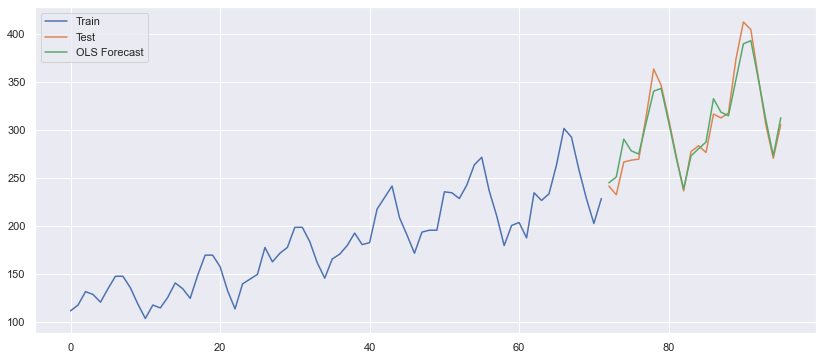

In [112]:
plt.figure(figsize = (14,6))
plt.plot(train_data['Passengers'], label ='Train')
plt.plot(test_data['Passengers'], label ='Test')
plt.plot(np.exp(pred_mult_add_sea), label ='OLS Forecast')
plt.legend(loc ='best')
plt.show()

In [113]:
data = {"Models":pd.Series(["rmse_linear","rmse_exp","rmse_quad","rmse_add_sea","rmse_add_sea_quad","rmse_mult_sea",
                            "rmse_mult_add_sea"]),
        "RMSE_Values":pd.Series([rmse_linear, rmse_exp, rmse_quad, rmse_add_sea, rmse_add_sea_quad, rmse_mult_sea, 
                                 rmse_mult_add_sea])}
table_rmse=pd.DataFrame(data)
table_rmse.sort_values(['RMSE_Values'], inplace=True, ignore_index=True)

In [114]:
e = table_rmse.append(table_evaluation)
e.drop('MAPE(%)', axis=1, inplace=True)
e.sort_values(['RMSE_Values'], inplace=True, ignore_index=True)

C:\Users\BHANUKIRAN\AppData\Local\Temp\ipykernel_12816\946622871.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  e = table_rmse.append(table_evaluation)


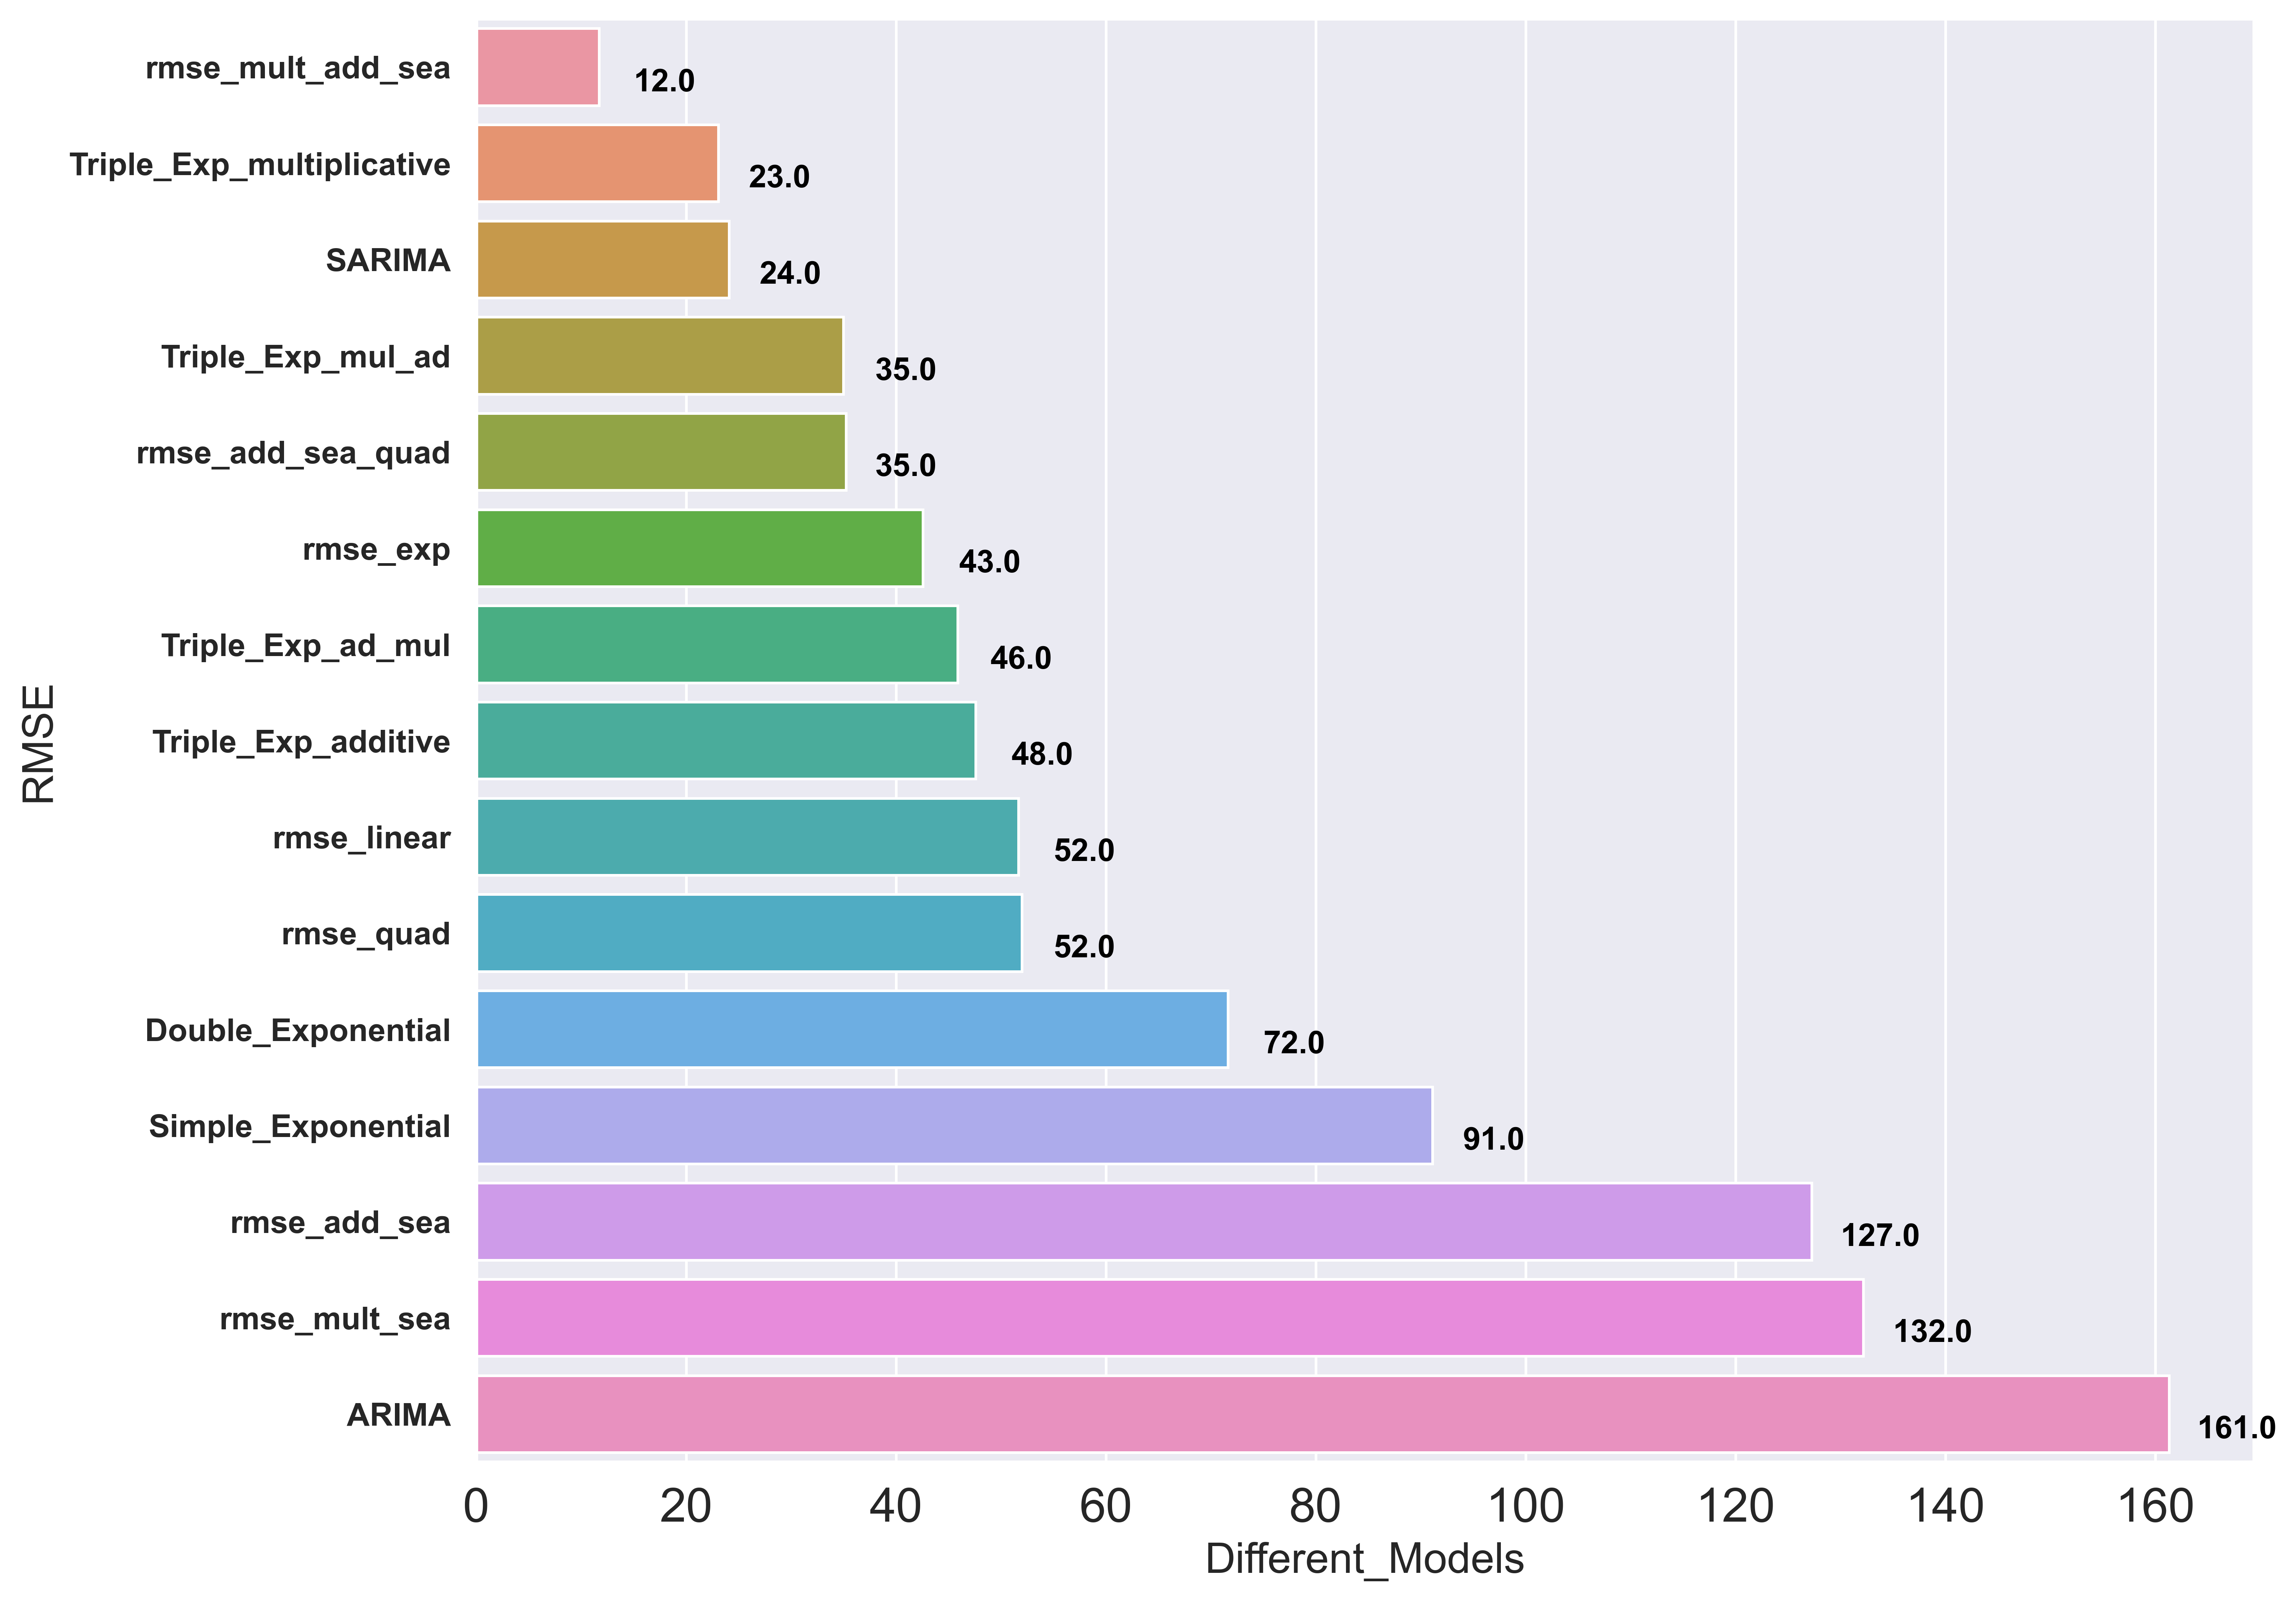

In [115]:
f, axe = plt.subplots(1, 1, figsize =(12,10), dpi = 500)
sns.barplot(x='RMSE_Values', y='Models', data = e, ax = axe)
axe.set_xlabel('Different_Models', size = 16)
axe.set_ylabel('RMSE', size = 16)
plt.yticks(fontsize = 12, fontweight = 'bold')
plt.xticks(fontsize = 18)

for i, v in enumerate(np.round(e.RMSE_Values.values,0)):
    axe.text(v + 3, i + .25, str(v), color = 'black', fontweight = 'bold', fontsize = 12)
plt.show()